# Проект: Линейные модели в машинном обучении

## Цель: разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке. 

## Задачи: 


- ### Загрузить и изучить данные из файлов: /datasets/ferma_main.csv; /datasets/ferma_dad.csv; /datasets/cow_buy.csv

    - Файл ferma_main.csv содержит данные о стаде фермера на текущий момент; 
    
    - Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера;
    
    - Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.


- ### Проверить данные на наличие пропусков и дубликатов. Узнать, корректны ли типы данных у каждого признака. Устранить все проблемы с данными


- ### Провести исследовательский анализ данных
    - Провести статистический анализ всех признаков;
    - Построить графики для каждого признака;
    - Сделать выводы о данных;


- ### Провести корреляционный анализ признаков в датасете ferma_main.csv
    - Изучить взаимосвязь между признаками: рассчитать коэффициенты корреляции между всеми признаками;
    - Построить диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков;
    - Сделать выводы о взаимосвязи признаков;


- ### Обучить три модели простой линейной регрессии:
    - Обучите на данные из датасета ferma_main.csv первую модель, используя в качестве целевого признак Удой, кг;
    - Подготовить данные с учётом связи входных признаков с целевым и обучить на них вторую модель;
    - Добавить в данные новый признак и обучить на них третью модель;


- ### Создать две прогнозные модели для отбора бурёнок в поголовье:

    - Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
    - Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

---

## Загрузка данных

#### Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_score,
    r2_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#### Загрузка датафреймов

In [2]:
df_ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df_ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

##  Предобработка данных

#### Предобработка df_ferma_main

In [3]:
df_ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


##### Приведение названий столбцов к единому стилю

In [4]:
df_ferma_main.columns = df_ferma_main.columns.str.replace('порода папы_быка', 'Порода папы быка')
df_ferma_main.columns = df_ferma_main.columns.str.replace('Жирность,%', 'Жирность, %')
df_ferma_main.columns = df_ferma_main.columns.str.replace('Белок,%', 'Белок, %')

In [5]:
df_ferma_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'Порода папы быка', 'Жирность, %', 'Белок, %',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [6]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   Порода папы быка                       634 non-null    object
 8   Жирность, %                            634 non-null    object
 9   Белок, %                               634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

##### Приведение столбцов к необходимым типам данных

In [7]:
columns_to_convert = [
    'ЭКЕ (Энергетическая кормовая единица)',
    'СПО (Сахаро-протеиновое соотношение)',
    'Жирность, %', 
    'Белок, %'
]

for col in columns_to_convert:
    df_ferma_main[col] = df_ferma_main[col].str.replace(',', '.').astype(float)

##### Приведение значений в столбце 'Возраст' к единому стилю

In [8]:
# df_ferma_main = df_ferma_main.astype(str).replace('_', ' ', regex=True)

In [9]:
df_ferma_main['Возраст'] = df_ferma_main['Возраст'].str.replace('более_2_лет', 'Более 2 лет')
df_ferma_main['Возраст'] = df_ferma_main['Возраст'].str.replace('менее_2_лет', 'Менее 2 лет')

##### Поиск и устранение пропусков и дубликатов

In [10]:
df_ferma_main.isna().sum()

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
Порода папы быка                         0
Жирность, %                              0
Белок, %                                 0
Вкус молока                              0
Возраст                                  0
dtype: int64

In [11]:
df_ferma_main[df_ferma_main.duplicated()]

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность, %","Белок, %",Вкус молока,Возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,Более 2 лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,Более 2 лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,Более 2 лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,Более 2 лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,Более 2 лет


In [12]:
df_ferma_main = df_ferma_main.drop_duplicates()

##### Приведение значений в столбце 'Порода' к единому стилю

In [13]:
df_ferma_main['Порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [14]:
df_ferma_main['Порода'] = df_ferma_main['Порода'].str.replace('РефлешнСоверинг', 'Рефлешн Соверинг')

##### Приведение значений в столбце 'Тип пастбища' к единому стилю

In [15]:
df_ferma_main['Тип пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [16]:
df_ferma_main['Тип пастбища'] = df_ferma_main['Тип пастбища'].str.replace('Равнинные', 'Равнинное')

##### Приведение значений в столбце 'Порода папы быка' к единому стилю

In [17]:
df_ferma_main['Порода папы быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [18]:
df_ferma_main['Порода папы быка'] = df_ferma_main['Порода папы быка'].str.replace('Айдиалл', 'Айдиал')

##### Приведение значений в столбце 'Вкус молока' к единому стилю

In [19]:
df_ferma_main['Вкус молока'] = df_ferma_main['Вкус молока'].str.replace('вкусно', 'Вкусно')
df_ferma_main['Вкус молока'] = df_ferma_main['Вкус молока'].str.replace('не Вкусно', 'Не вкусно')

In [20]:
df_ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность, %","Белок, %",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,Вкусно,Более 2 лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,Вкусно,Менее 2 лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,Не вкусно,Более 2 лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,Не вкусно,Более 2 лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,Вкусно,Менее 2 лет


#### Предобработка df_ferma_dad

In [21]:
df_ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [22]:
df_ferma_dad.columns = df_ferma_dad.columns.str.replace('Имя Папы', 'Имя папы')

In [23]:
df_ferma_dad['Имя папы'].sort_values().unique()

array(['Барин', 'Буйный', 'Геркулес', 'Соловчик'], dtype=object)

In [24]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


##### Поиск и устранение пропусков и дубликатов

In [25]:
df_ferma_dad.isna().sum()

id          0
Имя папы    0
dtype: int64

In [26]:
df_ferma_dad.duplicated().sum()

0

#### Предобработка df_cow_buy

In [27]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [28]:
df_cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


##### Приведение названий столбцов к единому стилю

In [29]:
df_cow_buy.columns = df_cow_buy.columns.str.replace('порода папы_быка', 'Порода папы быка')
df_cow_buy.columns = df_cow_buy.columns.str.replace('Имя_папы', 'Имя папы')
# Назовем столбцы с содержанием жирности  ибелка однотипно во всех датафреймах
df_cow_buy.columns = df_cow_buy.columns.str.replace('Текущая_жирность,%', 'Жирность, %')
df_cow_buy.columns = df_cow_buy.columns.str.replace('Текущий_уровень_белок,%', 'Белок, %')

In [30]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Порода            20 non-null     object
 1   Тип пастбища      20 non-null     object
 2   Порода папы быка  20 non-null     object
 3   Имя папы          20 non-null     object
 4   Жирность, %       20 non-null     object
 5   Белок, %          20 non-null     object
 6   Возраст           20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


##### Приведение столбцов к необходимым типам данных

In [31]:
columns_to_convert = [
    'Жирность, %',
    'Белок, %'
]

for col in columns_to_convert:
    df_cow_buy[col] = df_cow_buy[col].str.replace(',', '.').astype(float)

In [32]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            20 non-null     object 
 1   Тип пастбища      20 non-null     object 
 2   Порода папы быка  20 non-null     object 
 3   Имя папы          20 non-null     object 
 4   Жирность, %       20 non-null     float64
 5   Белок, %          20 non-null     float64
 6   Возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


##### Приведение значений в столбце 'Возраст' к единому стилю

In [33]:
df_cow_buy['Возраст'] = df_cow_buy['Возраст'].str.replace('более_2_лет', 'Более 2 лет')
df_cow_buy['Возраст'] = df_cow_buy['Возраст'].str.replace('менее_2_лет', 'Менее 2 лет')

##### Приведение значений в столбце 'Порода' к единому стилю

In [34]:
df_cow_buy['Порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [35]:
df_cow_buy['Порода'] = df_cow_buy['Порода'].str.replace('РефлешнСоверинг', 'Рефлешн Соверинг')

##### Приведение значений в столбце 'Тип пастбища' к единому стилю

In [36]:
df_cow_buy['Тип пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [37]:
df_cow_buy['Тип пастбища'] = df_ferma_main['Тип пастбища'].str.replace('холмистое', 'Холмистое')
df_cow_buy['Тип пастбища'] = df_ferma_main['Тип пастбища'].str.replace('равнинное', 'Равнинное')

##### Поиск и устранение пропусков и дубликатов

In [38]:
df_cow_buy.isna().sum()

Порода              0
Тип пастбища        0
Порода папы быка    0
Имя папы            0
Жирность, %         0
Белок, %            0
Возраст             0
dtype: int64

In [39]:
df_cow_buy.duplicated().sum()

2

In [40]:
df_cow_buy[df_cow_buy.duplicated()]

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность, %","Белок, %",Возраст
6,Вис Бик Айдиал,Равнинное,Айдиал,Геркулес,3.58,3.076,Более 2 лет
8,Рефлешн Соверинг,Холмистое,Соверин,Барин,3.59,3.074,Более 2 лет


**В данном случае дубликаты не являются ошибкой, а просто совпадением, поэтому удалять нельзя**

### Вывод:

В полученных данных удалены дубликаты, проверены отсутствие пропусков и скорректированы типы данных и названия.

## Исследовательский анализ данных

#### Функции графиков

##### Функция 'plot_boxplot' для диаграммы рассеивания

In [41]:
def plot_boxplot(df, column_name):
    df.boxplot(column=column_name)
    plt.title(f'Диаграмма рассеивания: {column_name}')
    plt.show()

##### Функция 'plot_hist' для гистограммы распределения

In [42]:
def plot_hist(df, column_name, bins=20, edgecolor='black', grid=True):
    plt.figure(figsize=(20, 7))
    plt.hist(df[column_name], bins=bins, edgecolor=edgecolor)
    plt.title(f'Гистограмма распределения: {column_name}')
    plt.grid(grid)
    plt.show()

##### Функция 'plot_barh' для частоты встречаемости

In [43]:
def plot_barh(df, column_name, color='blue', figsize=(10, 4)):
    data_grouped = df[[column_name]].groupby(column_name).size().rename('Частота встречаемости')
    plt.figure(figsize=figsize)
    data_grouped.plot.barh(color=color, label=column_name)
    plt.title(column_name)
    plt.xlabel('Частота встречаемости')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

#### Исследовательский анализ df_ferma_main

In [44]:
df_ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность, %","Белок, %",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,Вкусно,Более 2 лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,Вкусно,Менее 2 лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,Не вкусно,Более 2 лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,Не вкусно,Более 2 лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,Вкусно,Менее 2 лет


##### Столбец 'Удой, кг'

In [45]:
df_ferma_main['Удой, кг'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: Удой, кг, dtype: float64

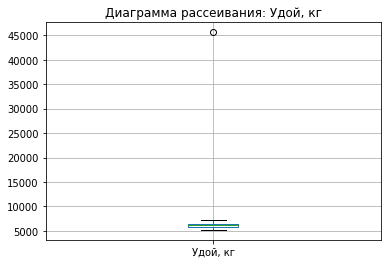

In [46]:
plot_boxplot(df_ferma_main, 'Удой, кг')

**Видим аномальное значение. Удаляем его**

In [47]:
df_ferma_main = df_ferma_main.loc[df_ferma_main['Удой, кг'] < 45000]

In [48]:
df_ferma_main['Удой, кг'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: Удой, кг, dtype: float64

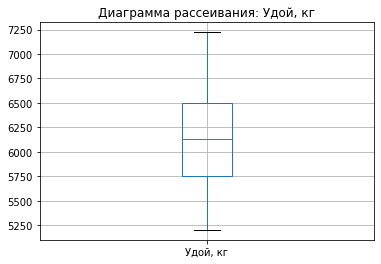

In [49]:
plot_boxplot(df_ferma_main, 'Удой, кг')

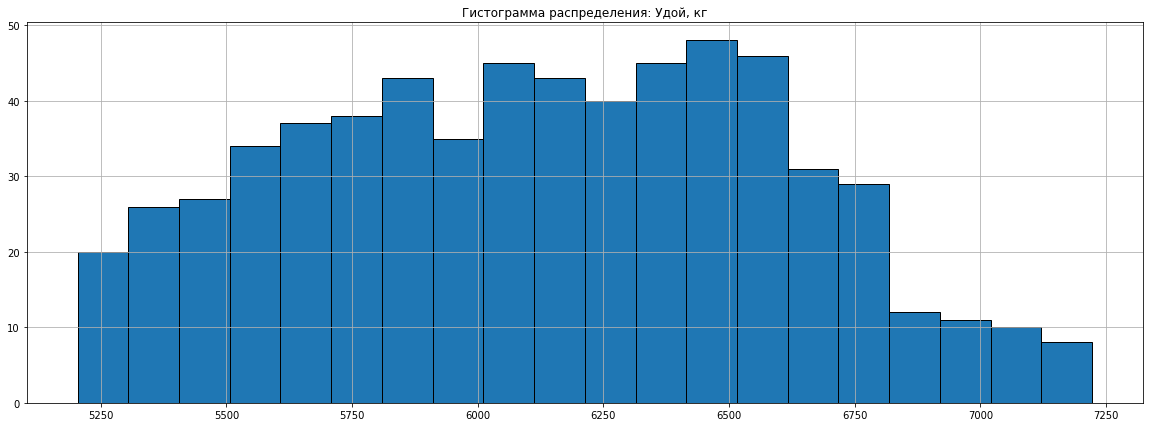

In [50]:
plot_hist(df_ferma_main, 'Удой, кг')

**Данные не имеют нормального распределения**

##### Столбец 'ЭКЕ (Энергетическая кормовая единица)'

In [51]:
df_ferma_main['ЭКЕ (Энергетическая кормовая единица)'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: ЭКЕ (Энергетическая кормовая единица), dtype: float64

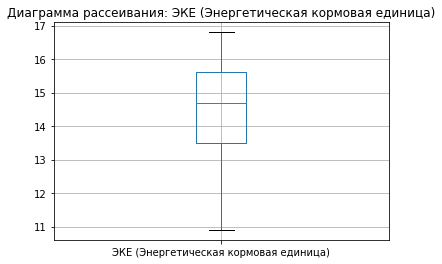

In [52]:
plot_boxplot(df_ferma_main, 'ЭКЕ (Энергетическая кормовая единица)')

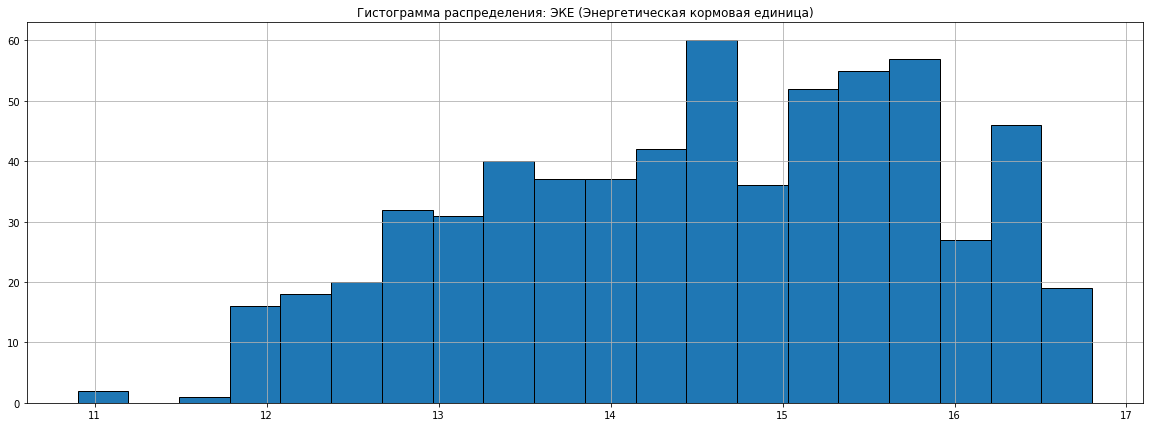

In [53]:
plot_hist(df_ferma_main, 'ЭКЕ (Энергетическая кормовая единица)')

**Данные преимущественно находятся в диапозе от 13.3 до 15.9**

##### Столбец 'Сырой протеин, г'

In [54]:
df_ferma_main['Сырой протеин, г'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: Сырой протеин, г, dtype: float64

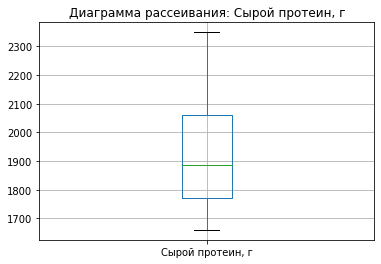

In [55]:
plot_boxplot(df_ferma_main, 'Сырой протеин, г')

**Аномальных значений нет**

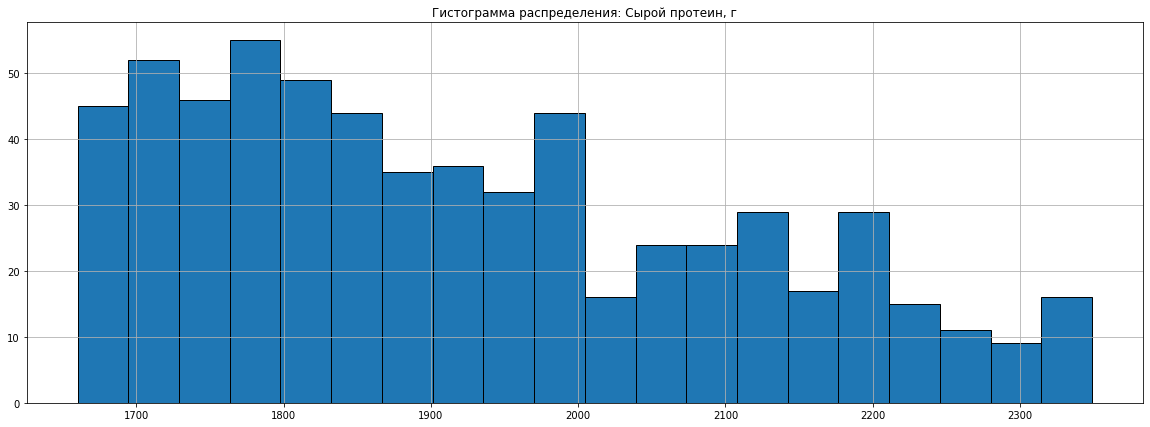

In [56]:
plot_hist(df_ferma_main, 'Сырой протеин, г')

**Данные преимущественно находятся в диапозе от 1700 до 2000**

##### Столбец 'СПО (Сахаро-протеиновое соотношение)'

In [57]:
df_ferma_main['СПО (Сахаро-протеиновое соотношение)'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: СПО (Сахаро-протеиновое соотношение), dtype: float64

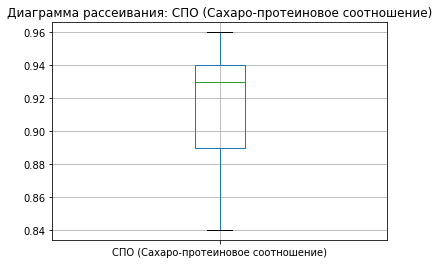

In [58]:
plot_boxplot(df_ferma_main, 'СПО (Сахаро-протеиновое соотношение)')

**Аномальных значений нет**

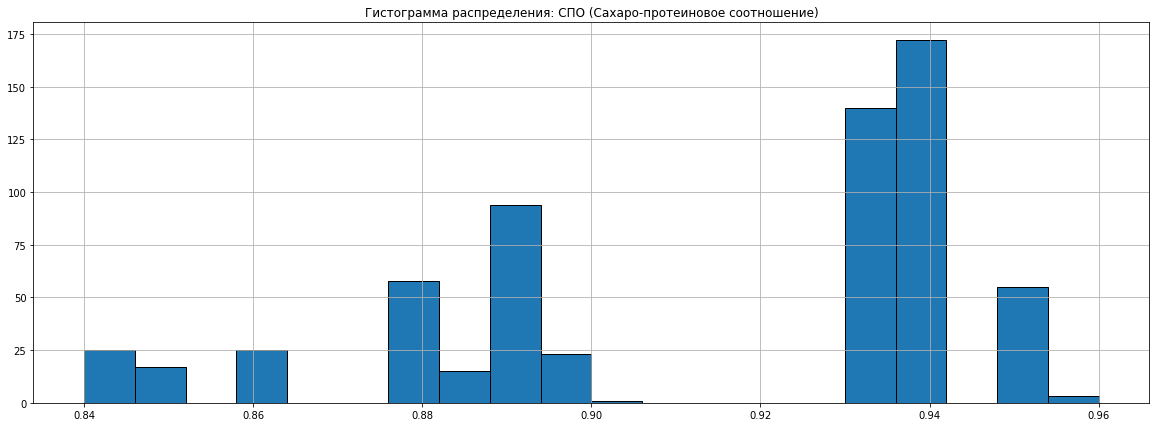

In [59]:
plot_hist(df_ferma_main, 'СПО (Сахаро-протеиновое соотношение)')

**Из гистограммы видно, что если три различимых диапазона данных**

##### Столбец 'Порода'

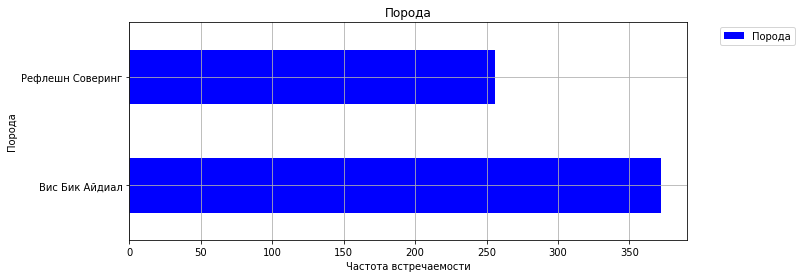

In [60]:
plot_barh(df_ferma_main, 'Порода')

**Порода "Вис Бик Айдал" преобладет над породой "Рефлешн Соверинг"**

##### Столбец 'Тип пастбища'

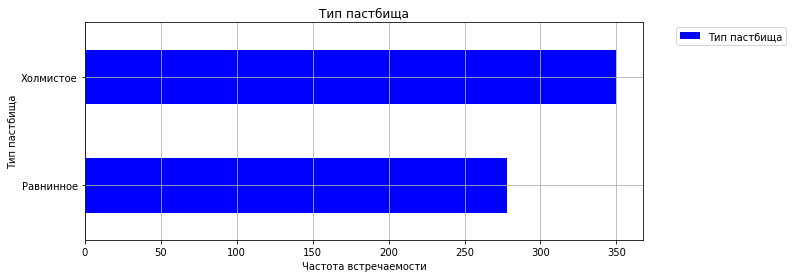

In [61]:
plot_barh(df_ferma_main, 'Тип пастбища')

**Тип пастбища "Холмистое" преобладает по кличеству над типом "Равнинное"**

##### Столбец 'Порода папы быка'

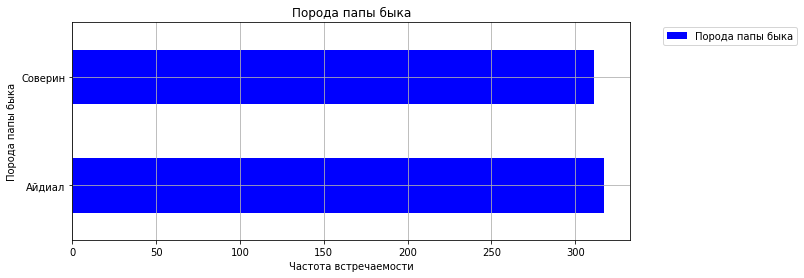

In [62]:
plot_barh(df_ferma_main, 'Порода папы быка')

**Породы пап быков "Айдиал" и "Соверин" представлены в почти равных пропорциях**

##### Столбец 'Жирность, %'

In [63]:
df_ferma_main['Жирность, %'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: Жирность, %, dtype: float64

**Аномальных значений нет**

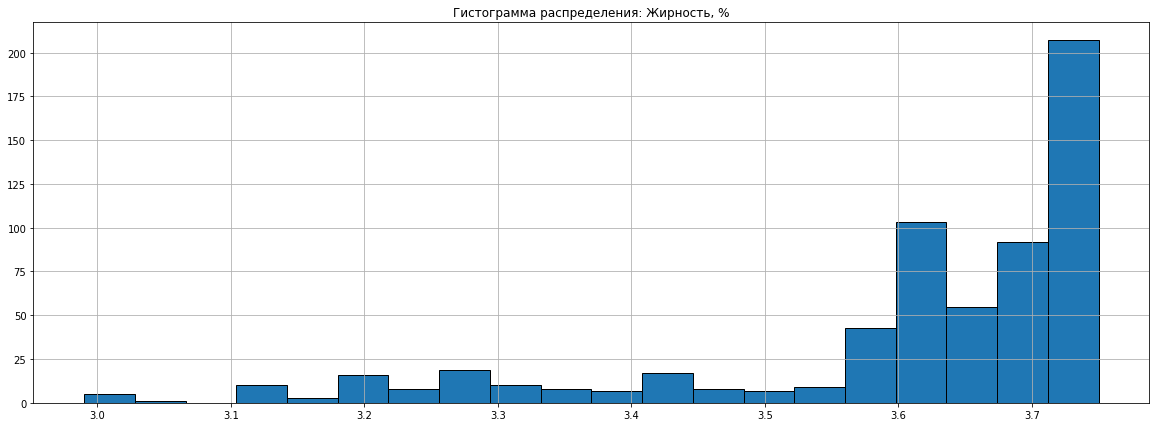

In [64]:
plot_hist(df_ferma_main, 'Жирность, %')

**Основное количество молока содержит жирность от 3.6% до 3.73%**

##### Столбец 'Белок, %'

In [65]:
df_ferma_main['Белок, %'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: Белок, %, dtype: float64

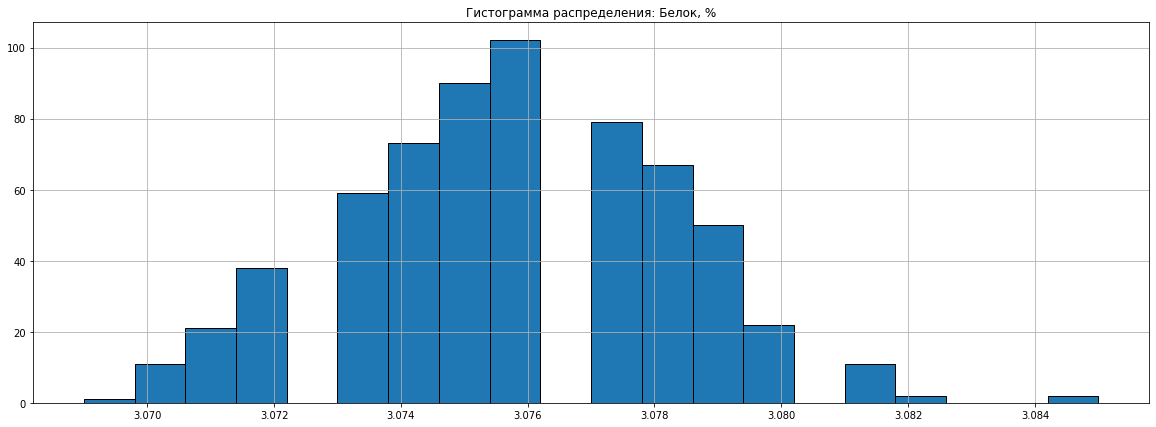

In [66]:
plot_hist(df_ferma_main, 'Белок, %')

**Процент белка имеет очень низкое стандратное отклонение, из-за чего значения концентрируются крайне близко к среднему 3.075670**

##### Столбец 'Вкус молока'

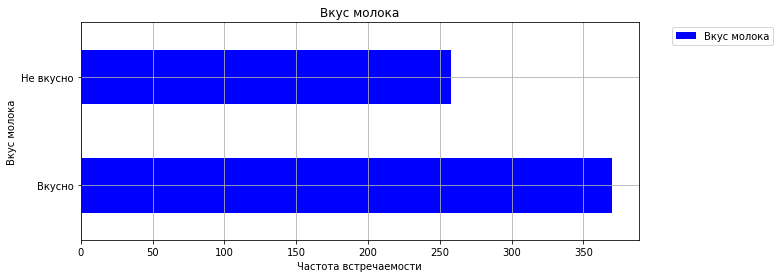

In [67]:
plot_barh(df_ferma_main, 'Вкус молока')

**Большее количетсва молока на ферме является вкусным**

##### Столбец 'Возраст'

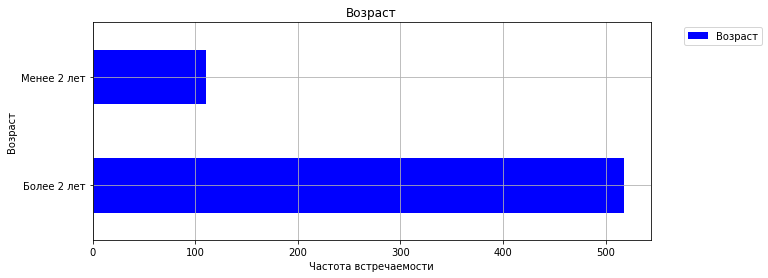

In [68]:
plot_barh(df_ferma_main, 'Возраст')

**Большинство коров старше двух лет**

#### Исследовательский анализ df_ferma_dad

In [69]:
df_ferma_dad.head()

,id,Имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


##### Столбец 'Имя папы'

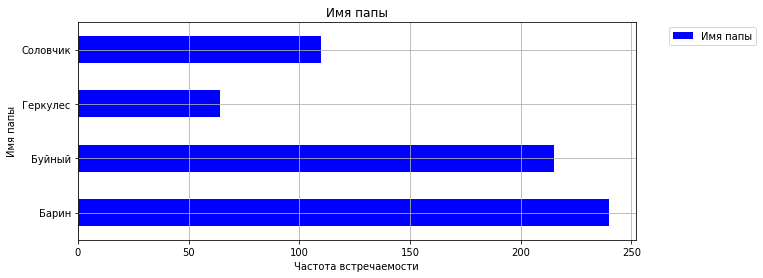

In [70]:
plot_barh(df_ferma_dad, 'Имя папы')

**Из диаграммы видно, что имя "Барин" самое частое, далее с небольшим отставанием имя "Буйный", потом "Соловчик" и реже всего встречается имя "Геркулес"**

#### Исследовательский анализ df_cow_buy

In [71]:
df_cow_buy.head()

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность, %","Белок, %",Возраст
0,Вис Бик Айдиал,Равнинное,Айдиал,Геркулес,3.58,3.076,Более 2 лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,Менее 2 лет
2,Рефлешн Соверинг,Холмистое,Соверин,Барин,3.59,3.074,Более 2 лет
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,Более 2 лет
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,Более 2 лет


##### Столбец 'Порода'

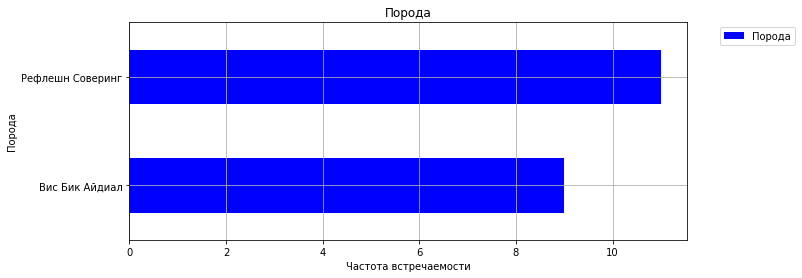

In [72]:
plot_barh(df_cow_buy, 'Порода')

**Количество коров породы 'Рефлешн Соверинг	' с небольшим отрывом преобладает над 'Вис Бик Айдиал'**

##### Столбец 'Тип пастбища'

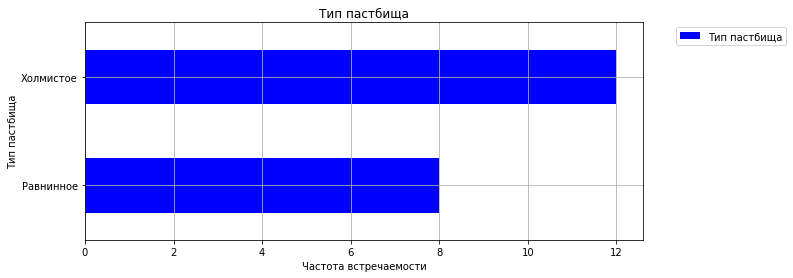

In [73]:
plot_barh(df_cow_buy, 'Тип пастбища')

**Тип пастбища 'Холмистое' пользуется большим спросом у коров**

##### Столбец 'Порода папы быка'

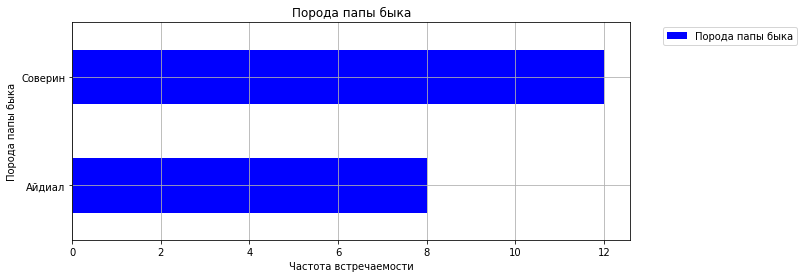

In [74]:
plot_barh(df_cow_buy, 'Порода папы быка')

**Среди пап быков в полтора раза чаще встречается порода 'Соверин', нежели 'Айдиал'**

##### Столбец 'Имя папы'

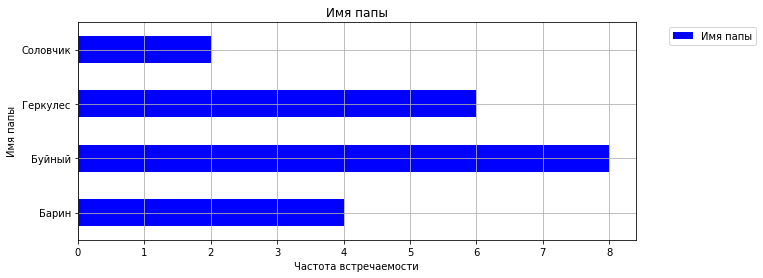

In [75]:
plot_barh(df_cow_buy, 'Имя папы')

**Среди имен пап самое распространенное - 'Буйный', далее 'Геркулес', потом 'Барин' и самое редкое - 'Соловчик'**

##### Столбец 'Жирность, %'

In [76]:
df_cow_buy['Жирность, %'].describe()

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: Жирность, %, dtype: float64

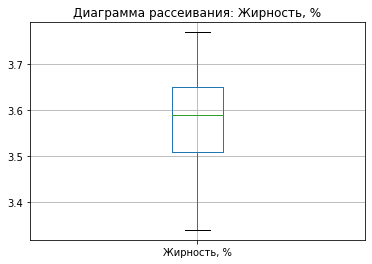

In [77]:
plot_boxplot(df_cow_buy, 'Жирность, %')

**Выбросы отсутствуют**

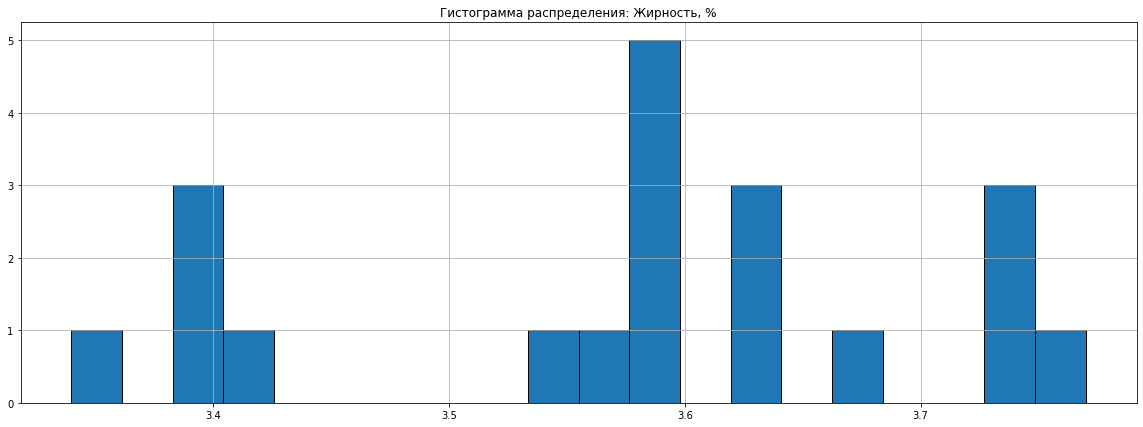

In [78]:
plot_hist(df_cow_buy, 'Жирность, %')

**Основные значения находятся в диапазоне 3.4 - 3.75**

##### Столбец 'Белок, %'

In [79]:
df_cow_buy['Белок, %'].describe()

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: Белок, %, dtype: float64

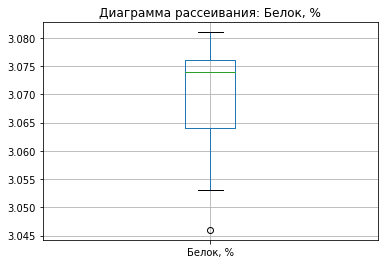

In [80]:
plot_boxplot(df_cow_buy, 'Белок, %')

**Выбросы отсутствуют**

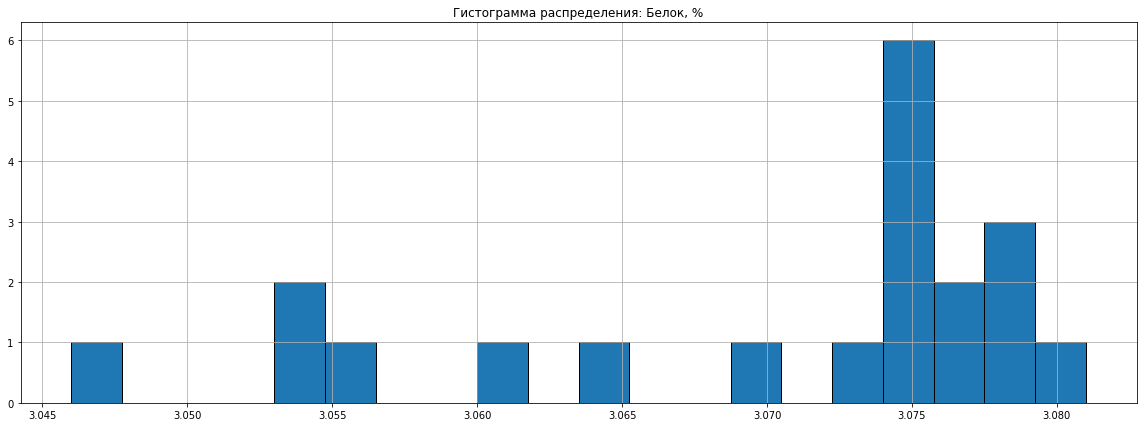

In [81]:
plot_hist(df_cow_buy, 'Белок, %')

**При очень маленькой дисперсии, значение 3.075 наиболее распространенное**

##### Столбец 'Возраст'

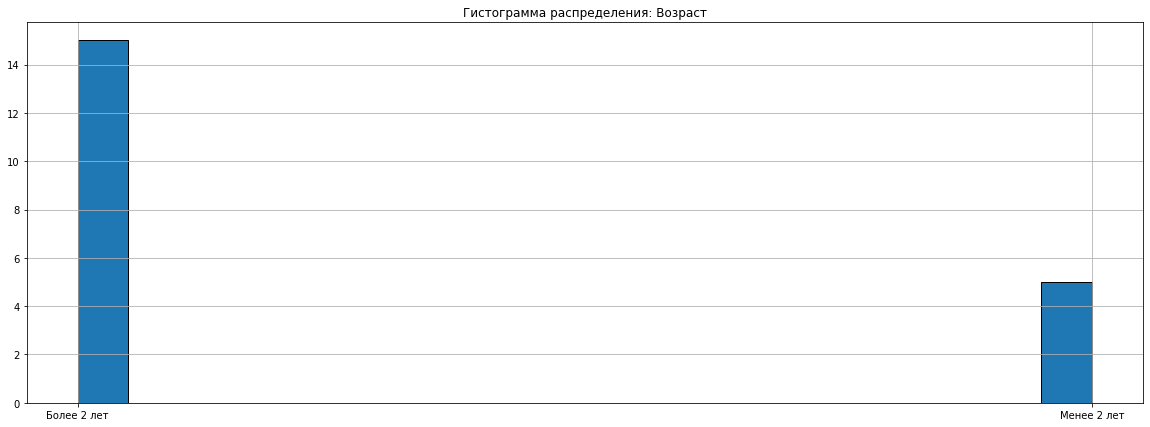

In [82]:
plot_hist(df_cow_buy, 'Возраст')

**Коров с возрастом более 2 лет в 3 раза больше, чем коров возрастом до 2 лет**

### Вывод:

В данных был обнаружен только один выброс, который находился в столбце удой в таблице фермера. Этот выброс был удален. Количественные данные характеризуются ненормальным распределением.

## Корреляционный анализ

##### Матрица диаграмм рассеяния взаимосвязей между количественными признаками и целевой переменной ('Удой, кг'), с разбивкой по категориальным признакам

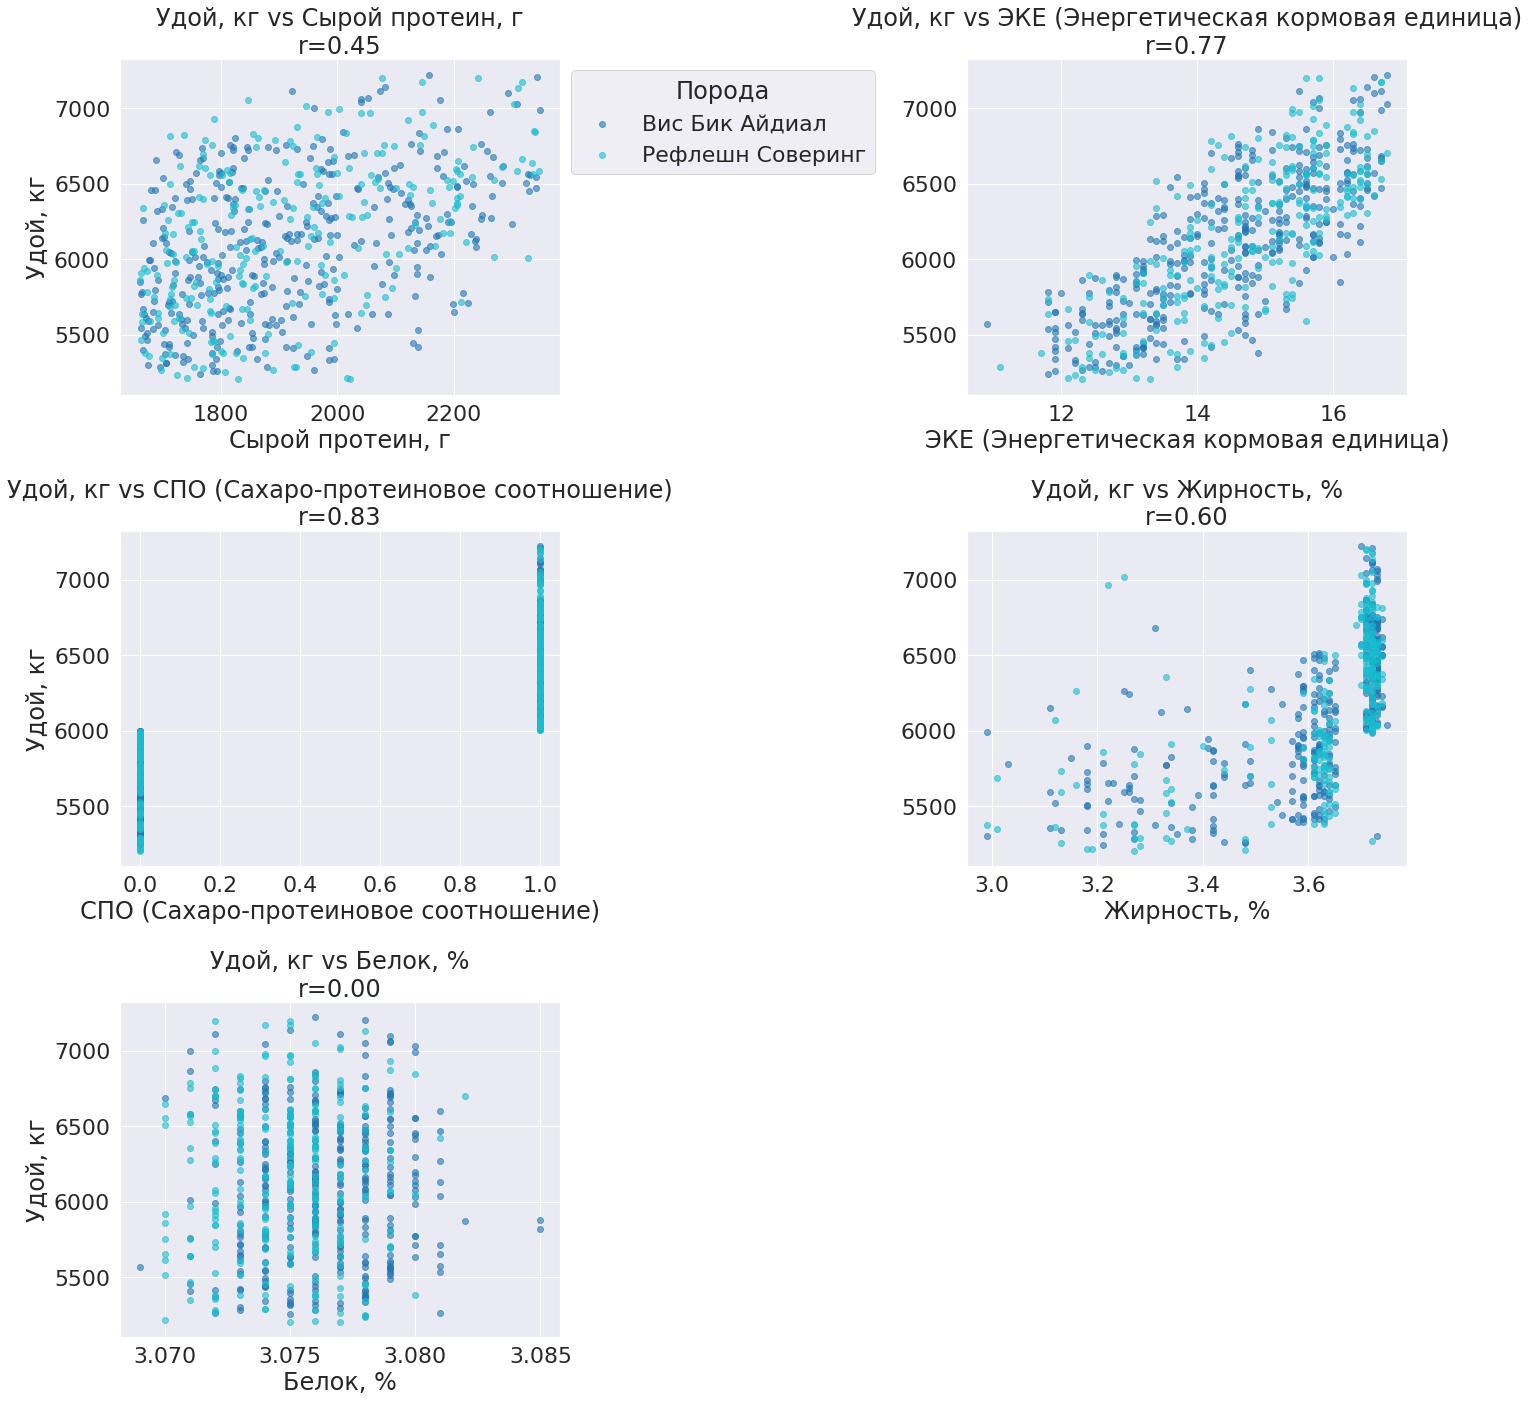

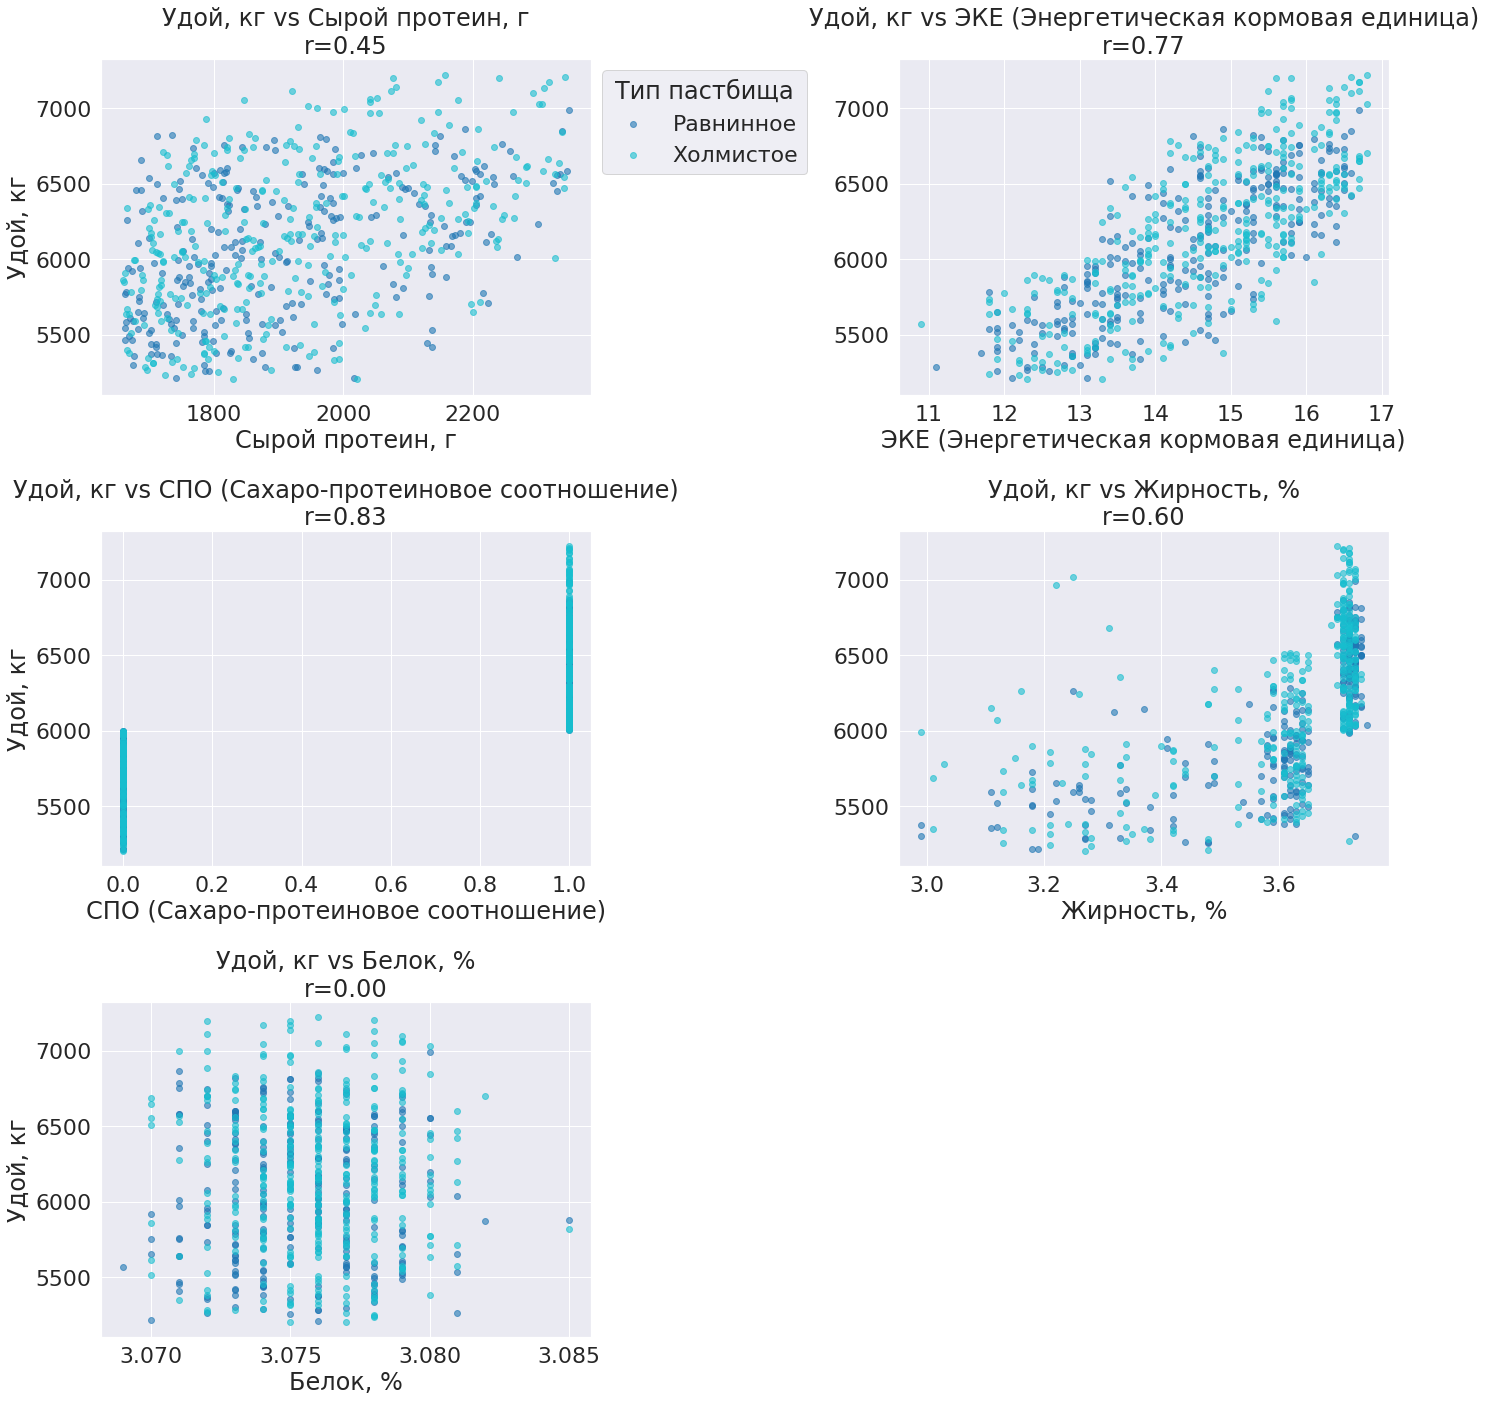

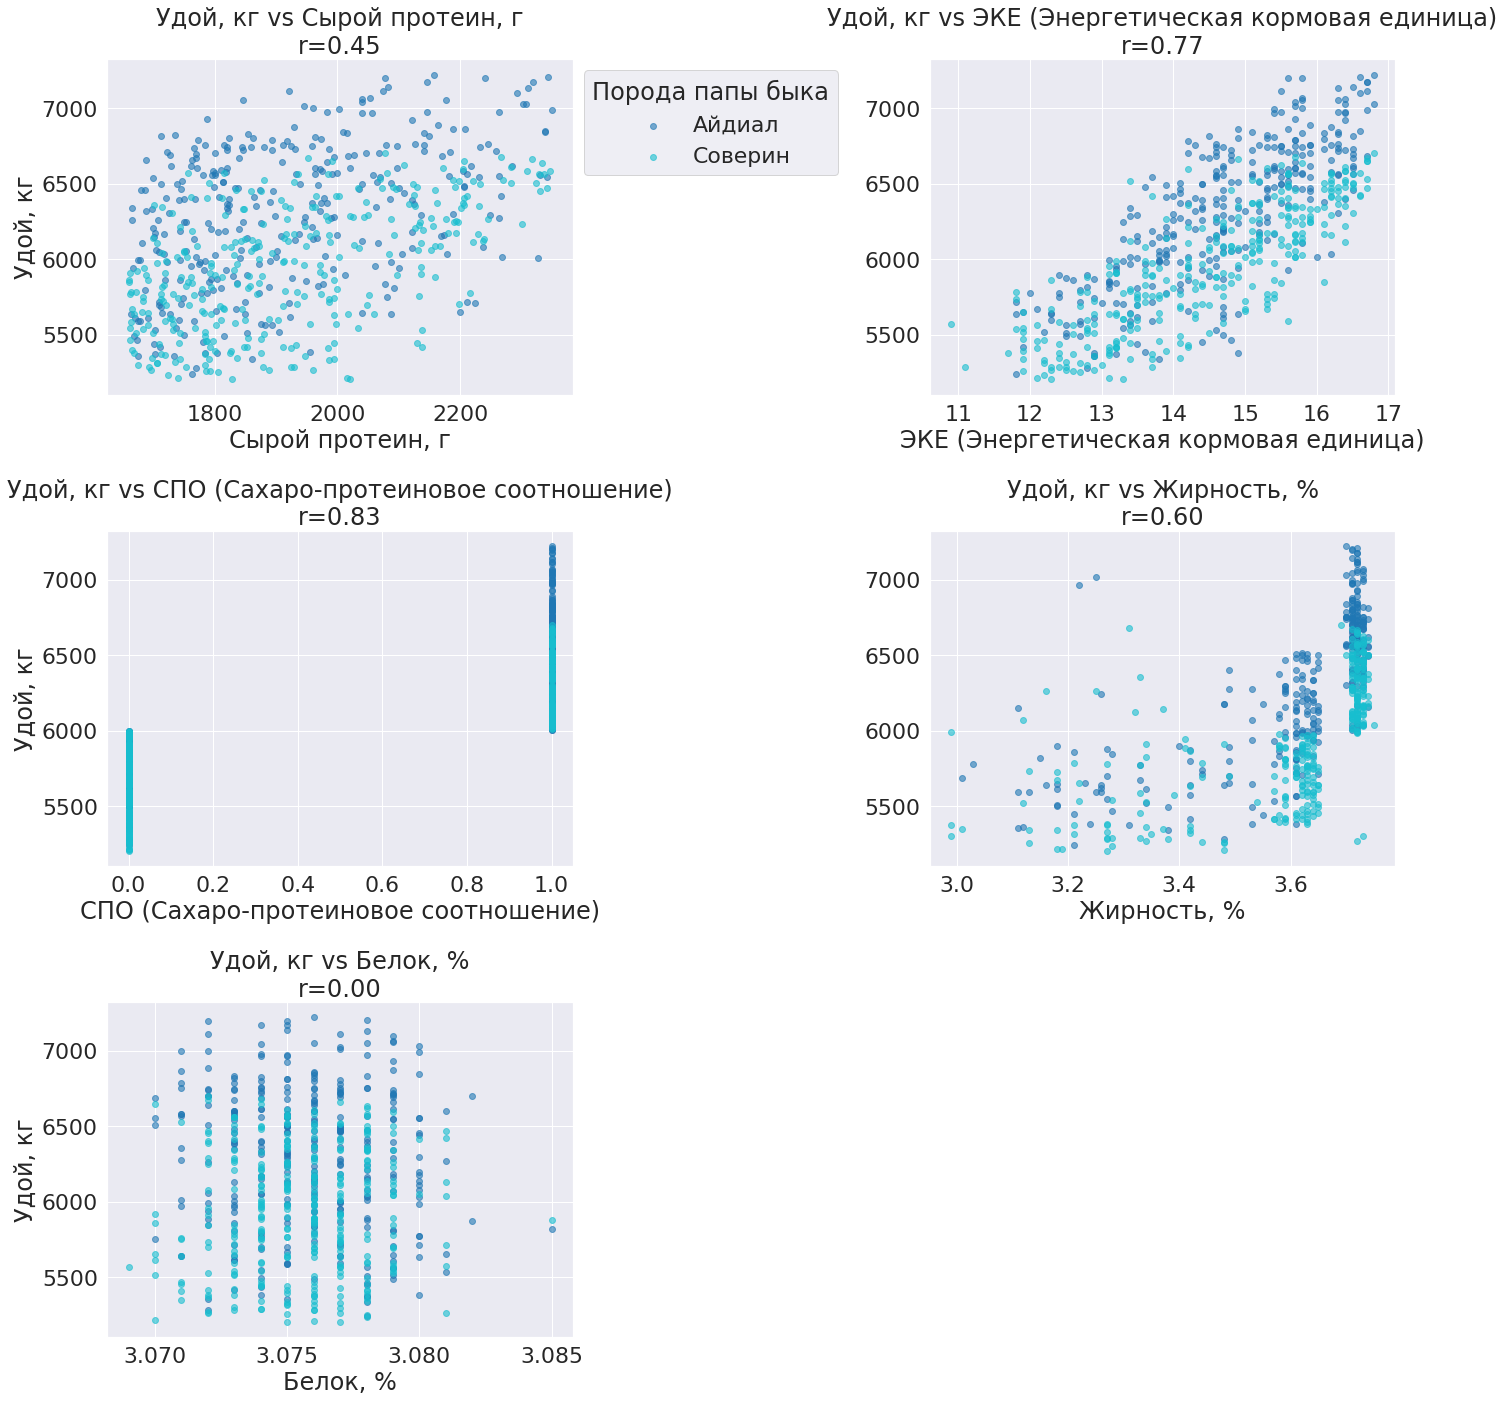

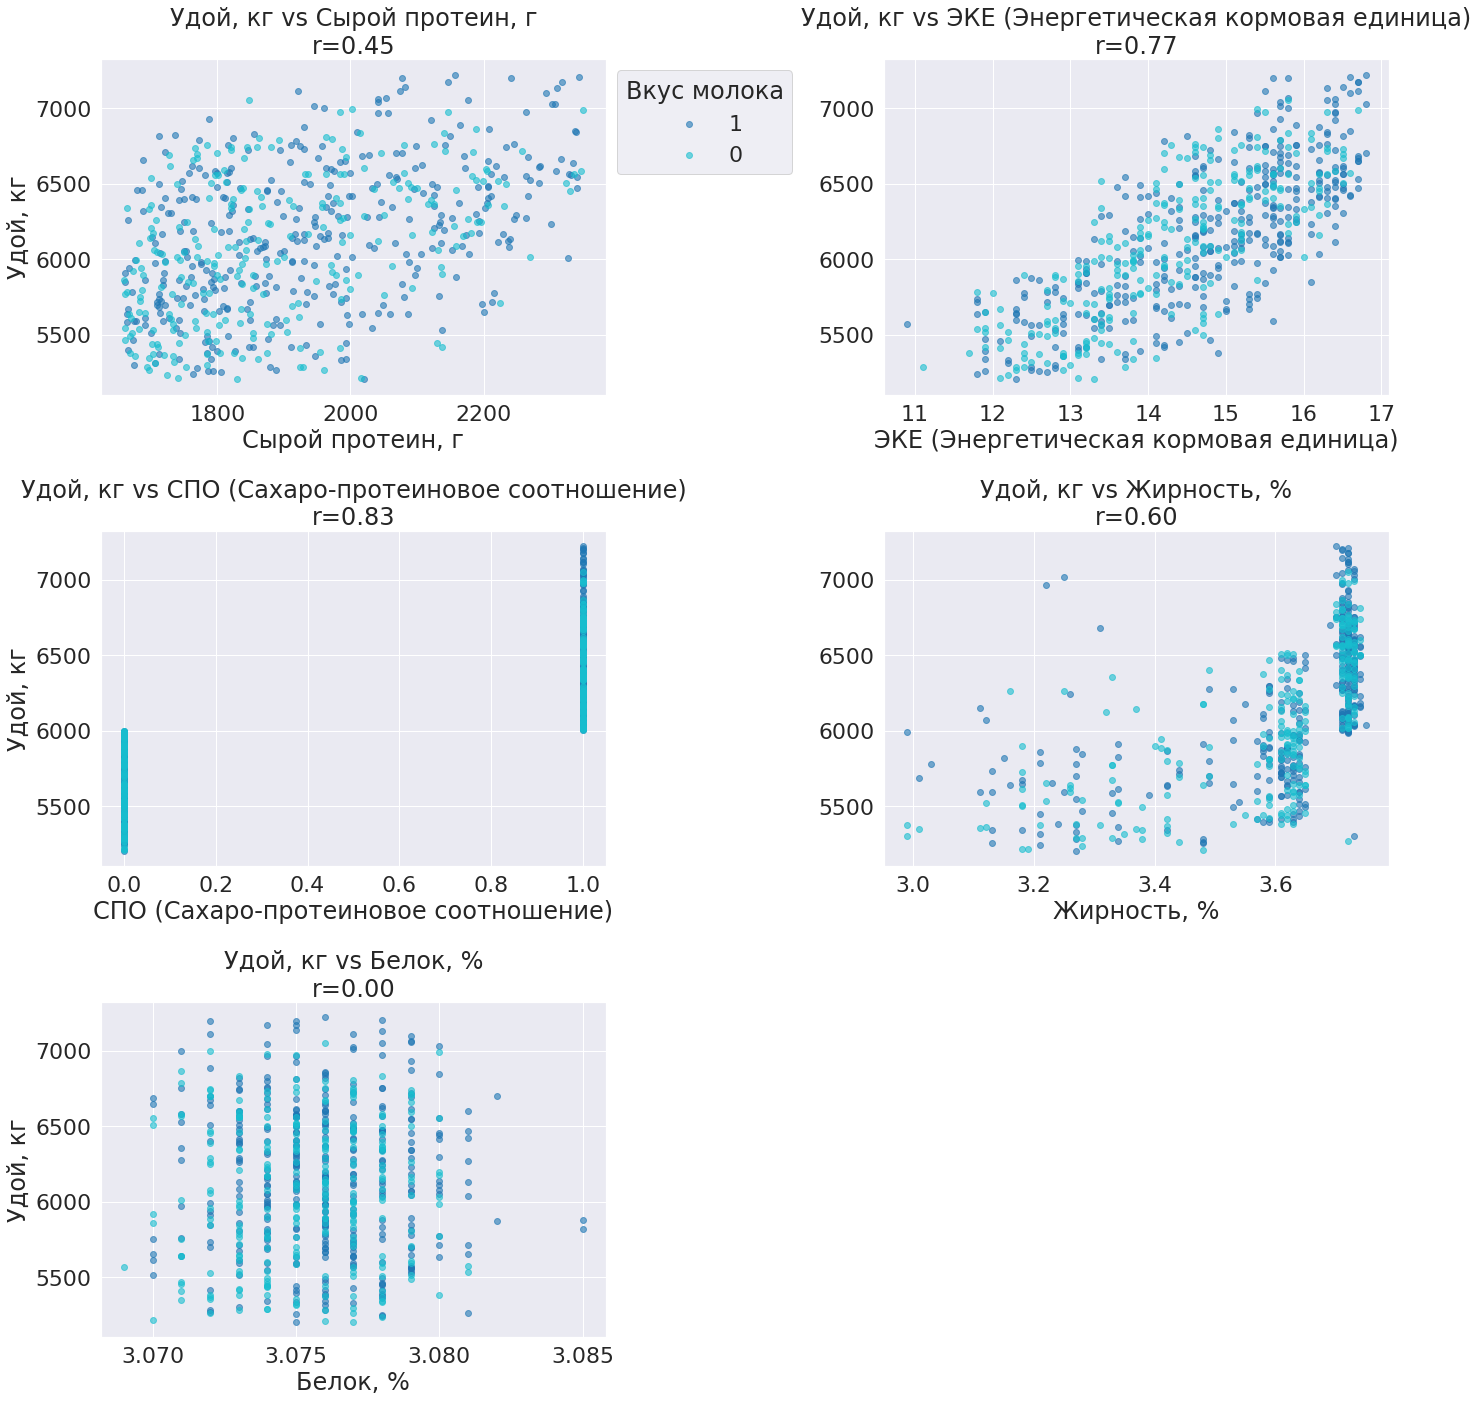

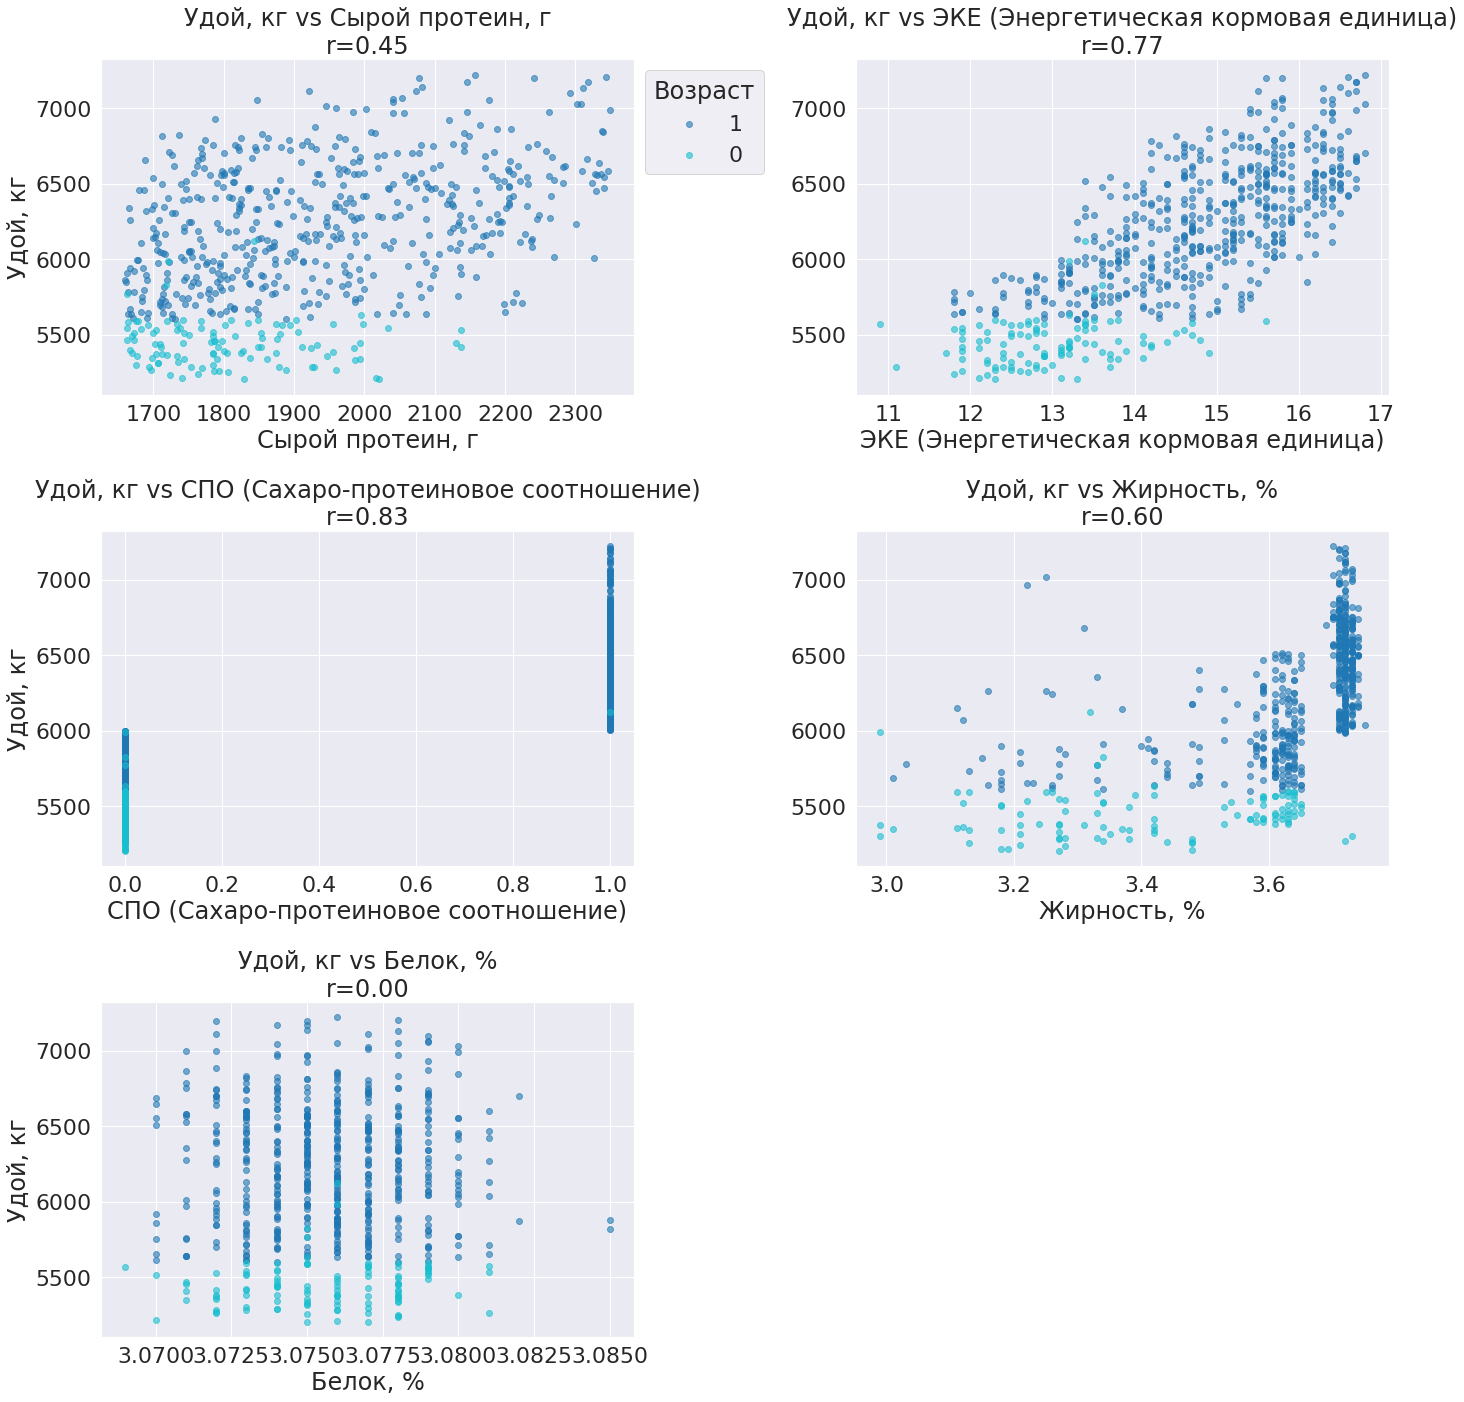

In [117]:
def scatter_matrix(df, x_cols, y_col, cat_col, cols=2, figsize=(20, 20)):
    n = len(x_cols)
    rows = (n - 1) // cols + 1
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    
    colors = plt.cm.tab10(np.linspace(0, 1, df[cat_col].nunique()))
    
    for i, x in enumerate(x_cols):
        for cat, color in zip(df[cat_col].unique(), colors):
            subset = df[df[cat_col] == cat]
            axes[i].scatter(subset[x], subset[y_col], c=[color], label=cat, alpha=0.6)
        
        axes[i].set_title(f'{y_col} vs {x}\nr={df[y_col].corr(df[x]):.2f}')
        axes[i].set(xlabel=x, ylabel=y_col if i % cols == 0 else '')
        
        if i == 0:
            axes[i].legend(title=cat_col, bbox_to_anchor=(1, 1))

    for j in range(n, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

categorical_features = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Вкус молока', 'Возраст']
quant_features = ['Сырой протеин, г', 'ЭКЕ (Энергетическая кормовая единица)', 
          'СПО (Сахаро-протеиновое соотношение)', 
          'Жирность, %', 
          'Белок, %']

for cat in categorical_features:
    scatter_matrix(df_ferma_main, quant_features, 'Удой, кг', cat)

##### Построение граффиков рассеяния для признака 'Удой, кг' и всех количественных признаков с учётом значения категориальных признаков.

In [84]:
# categorical_features = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Вкус молока', 'Возраст']

# quant_features = ['Сырой протеин, г', 'ЭКЕ (Энергетическая кормовая единица)', 
#                  'СПО (Сахаро-протеиновое соотношение)', 
#                  'Жирность, %', 
#                  'Белок, %']

# for cat_feature in categorical_features:
#     for quant_feature in quant_features:
#         scatter_with_categories(df_ferma_main,
#                               x_col=quant_feature,
#                               y_col='Удой, кг',
#                               category_col=cat_feature)

##### Построение матрицы диаграмм рассеяния

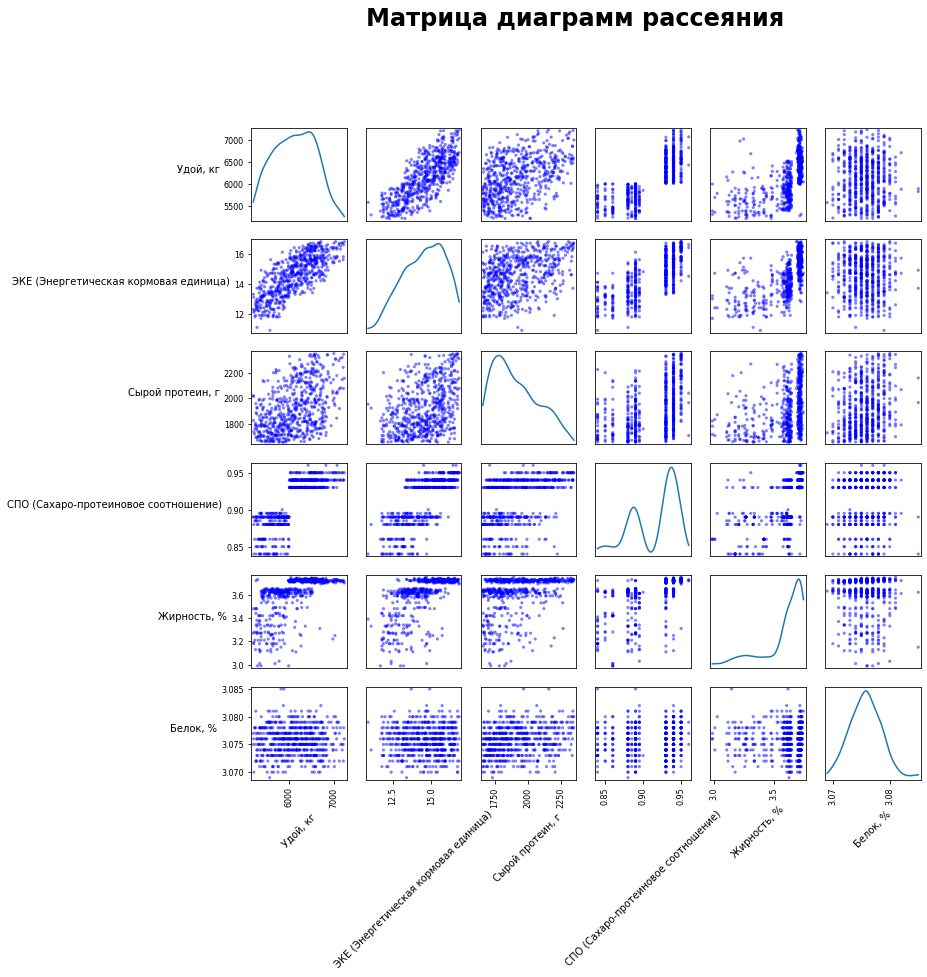

In [85]:
axes = pd.plotting.scatter_matrix(
    df_ferma_main[df_ferma_main.columns[df_ferma_main.columns != 'id']], 
    figsize=(12, 12),          
    diagonal='kde',            
    alpha=0.5,                 
    color='blue',              
    s=40                       
)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)    
    ax.xaxis.label.set_fontsize(10)    
    ax.yaxis.label.set_rotation(0)     
    ax.yaxis.label.set_ha('right')     
    ax.yaxis.label.set_fontsize(10)    

plt.suptitle(
    'Матрица диаграмм рассеяния', 
    fontsize=24, 
    fontweight='bold', 
    color='black', 
    y=1.02    
)

plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.show()

- Анализ показал, что зависимость удоев молока от ЭКЕ и содержания сырого протеина носит линейный характер;

- Зависимость удоев от других факторов нелинейная;

In [86]:
spearman_corr = df_ferma_main.corr(method='spearman')

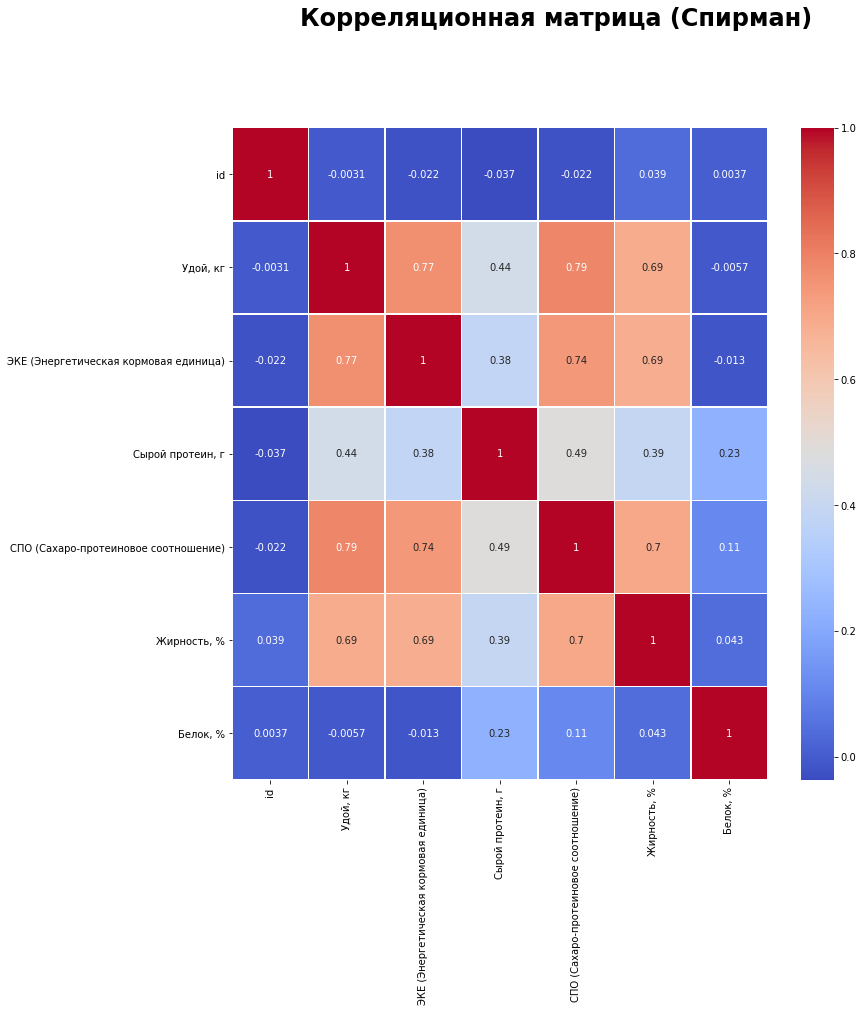

In [87]:
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.suptitle(
    'Корреляционная матрица (Спирман)', 
    fontsize=24, 
    fontweight='bold', 
    color='black', 
    y=1.02    
)
plt.show()

### Вывод:

##### Признаки, которые линейно не связаны с таргетом (имеют очень низкую корреляцию, близкую к нулю):


1. **Белок, %**  
   - Корреляция с Удоем, кг: **-0.0057**  
   - Корреляция с ЭКЕ: **-0.013**  
   - Корреляция с СПО: **0.11**  
   - Корреляция с Жирностью, %: **0.043**  
   

2. **Сырой протеин, г**  
   - Корреляция с Белком, %: **0.23** (умеренно низкая, но всё же выше, чем у других признаков)  


3. **Удой, кг**  
   - Корреляция с Белком, %: **-0.0057**  


4. **ЭКЕ**  
   - Корреляция с Белком, %: **-0.013**  


5. **СПО**  
   - Корреляция с Белком, %: **0.11**  


6. **Жирность, %**  
   - Корреляция с Белком, %: **0.043**  
 
Наиболее слабые линейные связи наблюдаются у **Белка, %** с остальными показателями, особенно с Удоем, кг и ЭКЕ. Остальные признаки демонстрируют умеренную или высокую корреляцию между собой, но слабо связаны с содержанием белка в молоке.

**Сделана корреляционная матрица для анализа взаимосвязей между показателями продуктивности и качества молока:**

<!-- **1. Удой, кг**

*Имеет очень высокую корреляцию с:*

- ЭКЕ (0.77)

- СПО (0.79)

- Жирность, % (0.69)

*Умеренная корреляция с:*

- Сырой протеин, г (0.38)

*Имеет очень низкую корреляцию с:*

- Белок, % (-0.0057)

**2. ЭКЕ (Энергетическая кормовая единица)**

*Имеет очень высокую корреляцию с:*

- Удой, кг (0.77)

- СПО (0.74)

- Жирность, % (0.69)

*Умеренная корреляция с:*

- Сырой потеин, г.

*Имеет очень низкую корреляцию с:*

- Белок, % (-0.013)

Белок, % (0.47)

**3. Сырой протеин, г**

*Умеренная корреляция с:*

- Удой, кг (0.44)

- ЭКЕ (0.38)

- СПО (0.49)

- Жирность, % (0.39)

*Имеет очень низкую корреляцию с:*

- Белок, % (0.23)

**4. СПО (Сахаро-протеиновое соотношение)**

*Имеет очень высокую корреляцию с:*

- Удой, кг (0.79)

- ЭКЕ (0.74)

- Сырой потеин, г. (0.74)

- Жирность, % (0.70)

*Имеет очень низкую корреляцию с:*

- Белок, % (0.11)

**5. Жирность, %**

*Имеет очень высокую корреляцию с:*

- Удой, кг (0.69)

- ЭКЕ (0.69)

- СПО (0.70)

*Умеренная корреляция с:*

- Сырой потеин, г. (0.39)

*Имеет очень низкую корреляцию с:*

- Белок, % (0.043)

**6. Белок, %**

*Имеет очень низкую корреляцию с:*

- Удой, кг (-0.0057)

- ЭКЕ (-0.013)

- Сырой потеин, г. (0.23)

- СПО (0.11)

- Жирность, % (0.043)

- Белок, % (-0.0057) -->

## Обучение модели линейной регрессии

##### Подготовим данные и построим модель линейной регрессии на основе данных из файла ferma_main.csv. Целевой признак будет Удой, кг

In [88]:
def prepare_data_and_model(a, b, c, d):
    RANDOM_STATE = 42
    
    X = a.drop(b, axis=1)
    y = a[b]
    
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)
    
    cat_col_names = c
    num_col_names = d
    
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    
    encoder_col_names = encoder.get_feature_names()
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
     
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    
    predictions = model_lr.predict(X_test)
    
    return {
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test,
    "predictions": predictions,
    "encoder": encoder,
    "scaler": scaler,
    "model": model_lr,
    }

##### Функция вычисления R2 - коэффициента детерминации для оценки качества модели

In [89]:
def calculate_r2_lr(func, a, b, c, d):
    func_result = func(a, b, c, d)
    r2_lr = r2_score(func_result["y_test"], func_result["predictions"])
    print(f'R2 LinearRegression = {r2_lr}')

##### Функция вычисления MSE - среднеквадратичной ошибки между предсказаниями и реальными значениями

In [90]:
def calculate_mse_lr(func, a, b, c, d):
    func_result = func(a, b, c, d)
    mse_lr = mean_squared_error(func_result["y_test"], func_result["predictions"])
    print(f'MSE LinearRegression = {mse_lr}')

##### Функция вычисления MAE - средней абсолютной ошибки

In [91]:
def calculate_mae_lr(func, a, b, c, d):
    func_result = func(a, b, c, d)
    mae_lr = mean_absolute_error(func_result["y_test"], func_result["predictions"])  # Опечатка: "predictions"
    print(f'MAE LinearRegression = {mae_lr}')

##### Функция вычисления RMSE - корень из MSE

In [92]:
def calculate_rmse_lr(func, a, b, c, d):
    func_result = func(a, b, c, d)
    rmse = mean_squared_error(func_result["y_test"], func_result["predictions"], squared=False)
    print(f'RMSE LinearRegression = {rmse}')

##### Построение графиков для анализа остатков модели:
1. Гистограмма распределения остатков
2. Scatter-plot остатков vs предсказания

In [93]:
def visualize_analysis(func, a, b, c, d):
    func_results = func(a, b, c, d)
    residuals = func_results["y_test"] - func_results["predictions"] 
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
    axes[0].hist(residuals, bins=100, color='blue')
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x=func_results["predictions"], y=residuals, color='blue')
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

##### Линейная регрессия для прогноза удоя с исходными признаками (включая СПО и ЭКЕ)

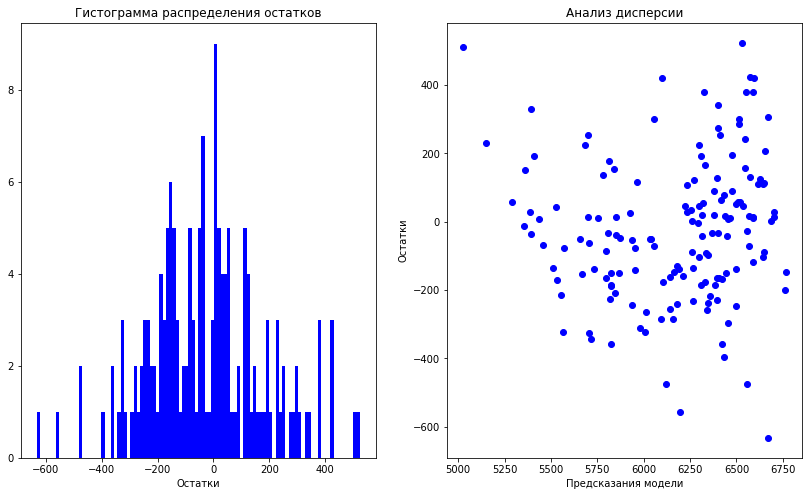

R2 LinearRegression = 0.7844078173416967
MSE LinearRegression = 43887.015009660514
MAE LinearRegression = 164.24194463474925
RMSE LinearRegression = 209.4922791170608


In [94]:
a = df_ferma_main

b = 'Удой, кг'
c = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст']
d = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)']

func = prepare_data_and_model
func_results = func(a, b, c, d)

visualize_analysis(func, a, b, c, d)

calculate_r2_lr(func, a, b, c, d)
calculate_mse_lr(func, a, b, c, d)
calculate_mae_lr(func, a, b, c, d)
calculate_rmse_lr(func, a, b, c, d)

**Гистограмма распределения остатков**:
Остатки преимущественно сосредоточены вокруг нуля, что говорит о хорошем соответствии модели. Также, наблюдаются выбросы, особенно в диапазоне от -600 до +400, что может указывать на наличие аномалий или погрешностей в модели.

**Анализ дисперсии**:
Остатки распределены случайным образом, без выраженных закономерностей, что говорит об отсутствии систематических ошибок. Однако присутствуют отдельные выбросы, которые указывают на то, что модель иногда допускает значительные ошибки при предсказании больших значений.

**График зависимости удоев от СПО**

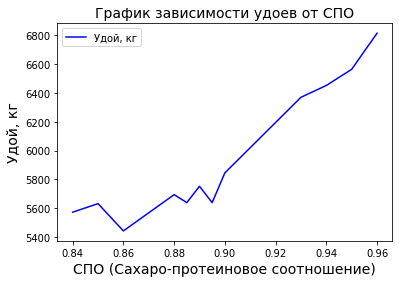

In [95]:
df_ferma_main.pivot_table(index='СПО (Сахаро-протеиновое соотношение)', values='Удой, кг', aggfunc='median').plot(color = 'blue')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)', fontsize=14, fontweight="normal", color='black')
plt.ylabel('Удой, кг', fontsize=14, fontweight="normal", color='black')
plt.title('График зависимости удоев от СПО', fontsize=14, fontweight="normal", color='black')
plt.show()

**В районе 0.90 есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу**

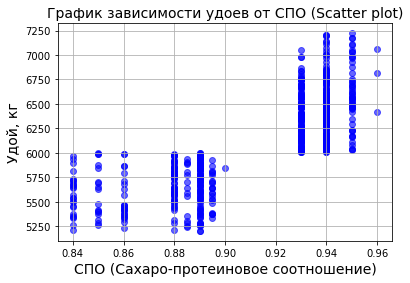

In [96]:
plt.scatter(df_ferma_main['СПО (Сахаро-протеиновое соотношение)'], df_ferma_main['Удой, кг'], color='blue', alpha=0.6)
plt.xlabel('СПО (Сахаро-протеиновое соотношение)', fontsize=14, fontweight="normal", color='black')
plt.ylabel('Удой, кг', fontsize=14, fontweight="normal", color='black')
plt.title('График зависимости удоев от СПО (Scatter plot)', fontsize=14, fontweight="normal", color='black')
plt.grid(True)
plt.show()

##### Линейная регрессия для прогноза удоя c СПО и квадратом ЭКЕ.

In [97]:
cpo_mean = df_ferma_main['СПО (Сахаро-протеиновое соотношение)'].mean()
# (>0.9 = 1, иначе 0)
df_ferma_main['СПО (Сахаро-протеиновое соотношение)'] = df_ferma_main['СПО (Сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x > 0.9 else 0)

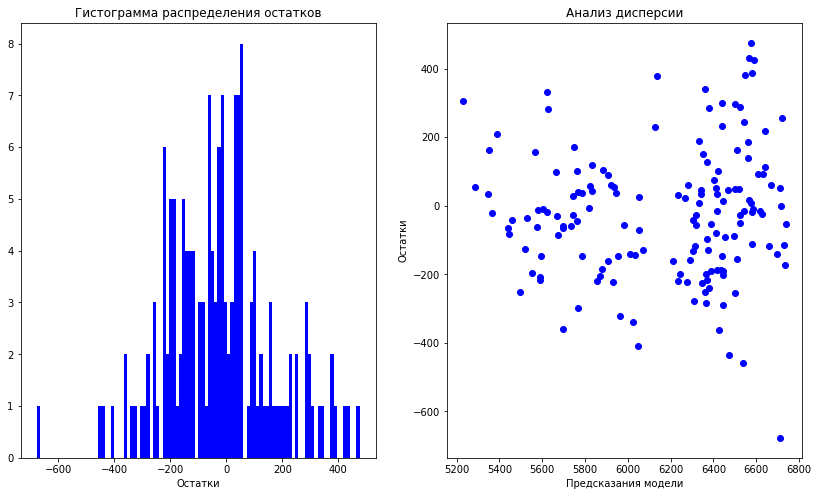

R2 LinearRegression = 0.8180879926867501
MSE LinearRegression = 37030.91131113695
MAE LinearRegression = 149.03965222364602
RMSE LinearRegression = 192.43417396901452


In [98]:
df_ferma_main['ЭКЕ в квадрате'] = df_ferma_main['ЭКЕ (Энергетическая кормовая единица)']**2
a = df_ferma_main
b = 'Удой, кг'
c = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст', 'СПО (Сахаро-протеиновое соотношение)']
d = ['ЭКЕ в квадрате', 'Сырой протеин, г']

func = prepare_data_and_model
func_results = func(a, b, c, d)

visualize_analysis(func, a, b, c, d)

calculate_r2_lr(func, a, b, c, d)
calculate_mse_lr(func, a, b, c, d)
calculate_mae_lr(func, a, b, c, d)
calculate_rmse_lr(func, a, b, c, d)

**Модель демонстрирует хорошие результаты: остатки распределены нормально, и на графике дисперсии нет явной зависимости от предсказаний**

##### Построим модель линейной регрессии, включив новый признак "Имя папы" из файла ferma_dad.csv.

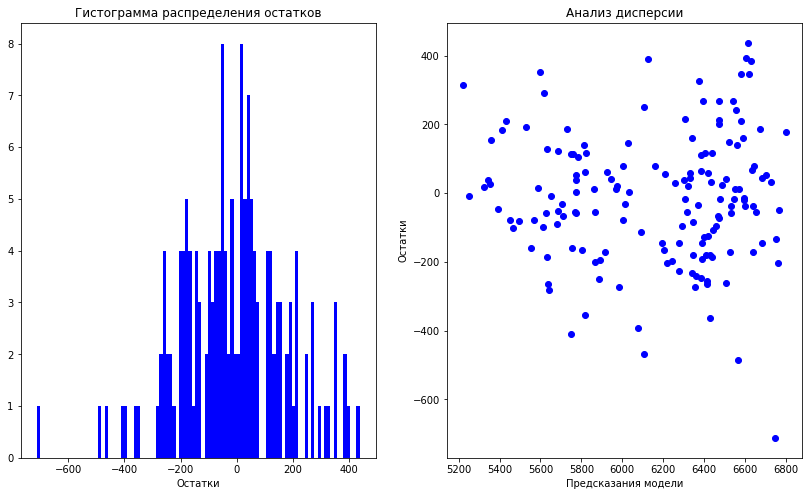

R2 LinearRegression = 0.8247542745210406
MSE LinearRegression = 35673.88988618195
MAE LinearRegression = 146.16302445362322
RMSE LinearRegression = 188.8753289505592


In [99]:
df_ferma_main_dad = pd.merge(df_ferma_main, df_ferma_dad) 
a = df_ferma_main_dad
b = 'Удой, кг'
c = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст', 'СПО (Сахаро-протеиновое соотношение)', 'Имя папы']
d = ['ЭКЕ в квадрате', 'Сырой протеин, г']
func = prepare_data_and_model
func_results = func(df_ferma_main_dad, b, c, d)

visualize_analysis(func, df_ferma_main_dad, b, c, d)

calculate_r2_lr(func, df_ferma_main_dad, b, c, d)
calculate_mse_lr(func, df_ferma_main_dad, b, c, d)
calculate_mae_lr(func, df_ferma_main_dad, b, c, d)
calculate_rmse_lr(func, df_ferma_main_dad, b, c, d)

**Последняя модель имеет более высокое значение 𝑅2(0.824), что показывает более точный резульатт. Метрики 𝑀𝑆𝐸, 𝑀𝐴𝐸 и 𝑅𝑀𝑆𝐸 также указывают на меньшие ошибки в этой модели.**

##### Добавим недостающие признаки ЭКЕ, Сырой протеин, г и СПО из датасета ferma_main.csv средние значения каждого из признаков и увеличим их на 5% в датафрейм df_cow_buy.

In [100]:
df_cow_buy['ЭКЕ (Энергетическая кормовая единица)'] = df_ferma_main['ЭКЕ (Энергетическая кормовая единица)'].mean()*1.05
df_cow_buy['ЭКЕ в квадрате'] = df_cow_buy['ЭКЕ (Энергетическая кормовая единица)']**2
df_cow_buy['Сырой протеин, г'] = df_ferma_main['Сырой протеин, г'].mean()*1.05
df_cow_buy['СПО (Сахаро-протеиновое соотношение)'] = cpo_mean*1.05
df_cow_buy['Возраст'] = 'Менее 2 лет'
df_cow_buy['Удой, кг'] = 0
df_cow_buy['СПО (Сахаро-протеиновое соотношение)'] = df_cow_buy['СПО (Сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x > 0.9 else 0)
df_cow_buy['Возраст'] = df_cow_buy['Возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
display(df_cow_buy)

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность, %","Белок, %",Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЕ в квадрате,"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Удой, кг"
0,Вис Бик Айдиал,Равнинное,Айдиал,Геркулес,3.58,3.076,0,15.276162,233.361138,2019.947532,1,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,233.361138,2019.947532,1,0
2,Рефлешн Соверинг,Холмистое,Соверин,Барин,3.59,3.074,0,15.276162,233.361138,2019.947532,1,0
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0,15.276162,233.361138,2019.947532,1,0
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0,15.276162,233.361138,2019.947532,1,0
5,Рефлешн Соверинг,Холмистое,Соверин,Геркулес,3.63,3.053,0,15.276162,233.361138,2019.947532,1,0
6,Вис Бик Айдиал,Равнинное,Айдиал,Геркулес,3.58,3.076,0,15.276162,233.361138,2019.947532,1,0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,0,15.276162,233.361138,2019.947532,1,0
8,Рефлешн Соверинг,Холмистое,Соверин,Барин,3.59,3.074,0,15.276162,233.361138,2019.947532,1,0
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,233.361138,2019.947532,1,0


In [101]:
df_ferma_main_dad['Возраст'] = df_ferma_main_dad['Возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
df_ferma_main_dad.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность, %","Белок, %",Вкус молока,Возраст,ЭКЕ в квадрате,Имя папы
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,Вкусно,1,201.64,Буйный
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,Вкусно,0,163.84,Соловчик
2,3,5810,14.0,1854,0,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,Не вкусно,1,196.00,Барин
3,4,5895,12.4,2012,0,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,Не вкусно,1,153.76,Буйный
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,Вкусно,0,163.84,Барин


##### С помощью более точной модели спрогнозируем удой коров, которых фермер хочет купить

In [102]:
X_train = df_ferma_main_dad
X_test = df_cow_buy

target = 'Удой, кг'
cat_col_names = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст', 'СПО (Сахаро-протеиновое соотношение)', 'Имя папы']
num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г']


X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) 
X_ohe = encoder.fit_transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
                  
model_lr  = LinearRegression()
model_lr.fit(X, y) 

X = X_test.drop(target, axis=1)
y = X_test[target]

X_ohe = encoder.transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1)   

predictions = model_lr.predict(X_cow)

df_cow_buy = df_cow_buy.reset_index(drop=True)

for i in range(len(df_cow_buy['Удой, кг'])):
    df_cow_buy.loc[i,'Удой, кг'] = predictions[i]

display(df_cow_buy.sort_values(by = 'Удой, кг', ascending = False))

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность, %","Белок, %",Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЕ в квадрате,"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Удой, кг"
5,Рефлешн Соверинг,Холмистое,Соверин,Геркулес,3.63,3.053,0,15.276162,233.361138,2019.947532,1,6414.5
17,Рефлешн Соверинг,Холмистое,Соверин,Геркулес,3.77,3.053,0,15.276162,233.361138,2019.947532,1,6414.5
11,Рефлешн Соверинг,Холмистое,Соверин,Геркулес,3.73,3.073,0,15.276162,233.361138,2019.947532,1,6414.5
19,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.64,3.074,0,15.276162,233.361138,2019.947532,1,6364.5
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0,15.276162,233.361138,2019.947532,1,6364.5
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,233.361138,2019.947532,1,6364.5
18,Вис Бик Айдиал,Холмистое,Соверин,Буйный,3.34,3.069,0,15.276162,233.361138,2019.947532,1,6363.5
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,0,15.276162,233.361138,2019.947532,1,6359.5
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0,15.276162,233.361138,2019.947532,1,6319.5
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,0,15.276162,233.361138,2019.947532,1,6319.5


In [103]:
X_train = df_ferma_main_dad
X_test = df_cow_buy

target = 'Удой, кг'
cat_col_names = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст', 'СПО (Сахаро-протеиновое соотношение)', 'Имя папы']
num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г']

X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(handle_unknown='error', sparse=False, drop='first')  
X_ohe = encoder.fit_transform(X[cat_col_names])

if hasattr(encoder, 'get_feature_names_out'):
    encoder_col_names = encoder.get_feature_names_out(cat_col_names)  
else:
    encoder_col_names = encoder.get_feature_names(cat_col_names)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)

model_lr = LinearRegression()
model_lr.fit(X, y)

X = X_test.drop(target, axis=1)
y = X_test[target]

X_ohe = encoder.transform(X[cat_col_names])
X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1)

predictions = model_lr.predict(X_cow)

df_cow_buy = df_cow_buy.reset_index(drop=True)

for i in range(len(df_cow_buy['Удой, кг'])):
    df_cow_buy.loc[i, 'Удой, кг'] = predictions[i]

display(df_cow_buy.sort_values(by='Удой, кг', ascending=False))

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность, %","Белок, %",Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЕ в квадрате,"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Удой, кг"
11,Рефлешн Соверинг,Холмистое,Соверин,Геркулес,3.73,3.073,0,15.276162,233.361138,2019.947532,1,6419.892072
5,Рефлешн Соверинг,Холмистое,Соверин,Геркулес,3.63,3.053,0,15.276162,233.361138,2019.947532,1,6419.892072
17,Рефлешн Соверинг,Холмистое,Соверин,Геркулес,3.77,3.053,0,15.276162,233.361138,2019.947532,1,6419.892072
19,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.64,3.074,0,15.276162,233.361138,2019.947532,1,6375.747238
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0,15.276162,233.361138,2019.947532,1,6375.747238
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,233.361138,2019.947532,1,6375.747238
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,0,15.276162,233.361138,2019.947532,1,6365.761058
18,Вис Бик Айдиал,Холмистое,Соверин,Буйный,3.34,3.069,0,15.276162,233.361138,2019.947532,1,6362.478673
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0,15.276162,233.361138,2019.947532,1,6327.206675
15,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.40,3.065,0,15.276162,233.361138,2019.947532,1,6327.206675


**Было выявлено 20 коров с прогнозируемым удоем более 6000 кг**

### Вывод:

- Преобразовали *Сахаро-протеинового соотношения (СПО)* в категориальный признак, из-за чего смогли выявить и применить границы нелинейности;


- Ввели признак "ЭКЕ в квадрате", что позволило повысить точности модели;  


- Добавили категориальный признак "Имя папы" для достижения максимальной точности прогнозирования;  


- Применили улучшенную модель для прогноза удоев коров.  

## Обучение модели логистической регрессии

##### Подготовим данные и построим модель логистической регрессии на основе данных из файла ferma_main.csv. Целевой признак будет Вкус молока. Построим матрицу ошибок

In [104]:
df_ferma_main['Возраст'] = df_ferma_main['Возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
df_ferma_main['Вкус молока'] = df_ferma_main['Вкус молока'].apply(lambda x: 1 if x == 'Вкусно' else 0)
df_cow_buy['Вкус молока'] = 0

Accuracy = 0.6242038216560509
Precision = 0.6198347107438017
Recall = 0.8522727272727273


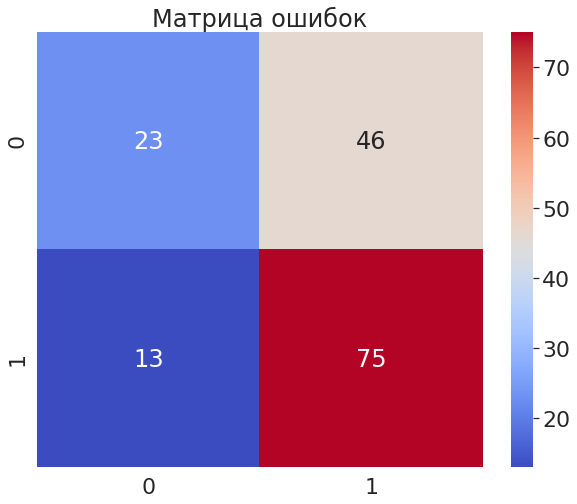

In [105]:
a = df_ferma_main
b = 'Вкус молока'
c = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст']
d = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 
     'СПО (Сахаро-протеиновое соотношение)', 'Жирность, %' , 'Белок, %']

RANDOM_STATE = 42

X = a.drop(b, axis=1)
y = a[b]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = c
num_col_names = d

encoder = OneHotEncoder(drop='first', sparse=False) 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names() 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)       

plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, y_pred)

sns.set (font_scale= 2 )
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm');
plt.title('Матрица ошибок')
print(f'Accuracy = {acc}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')

**Модель хорошо находит положительные классы (Recall = 0.85), но страдает от ложных срабатываний (Precision = 0.62)**

**Accuracy = 0.624** - модель правильно предсказывает вкус молока в 62.4% случаев.

**Precision = 0.620** - из всех предсказанных как "вкусное" молоко 62% действительно вкусные.

**Recall = 0.852** - модель находит 85.2% всего вкусного молока.

**Главная цель** — максимизировать долю вкусного молока - класс 1

*False Positive (FP*) - модель говорит, что молоко вкусное, но на самом деле нет.

*Риск*: заказчик купит корову с невкусным молоком.

*False Negative (FN)* - модель пропускает корову с вкусным молоком.

*Риск*: заказчик упустит хорошую корову.

Для заказчика критичнее FP (ложные "вкусные" прогнозы), так как это ведёт к прямым убыткам (покупка некачественных коров).
Но высокий Recall (мало FN) тоже важен, чтобы не упустить хороших коров.

##### Подготовка данных и обучение модели

In [106]:
a = df_ferma_main
b = 'Вкус молока'
c = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст']
d = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 
     'СПО (Сахаро-протеиновое соотношение)', 'Жирность, %' , 'Белок, %']

RANDOM_STATE = 42

X = a.drop(b, axis=1)
y = a[b]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = c
num_col_names = d

encoder = OneHotEncoder(drop='first', sparse=False) 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names() 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)  

y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba, y_pred), columns = ['y_valid', 'y_proba', 'y_pred']).sort_values(by='y_proba',ascending=False)

display(data) 

,y_valid,y_proba,y_pred
66,1,0.835375,1
85,1,0.834565,1
51,1,0.831855,1
110,1,0.824944,1
146,1,0.814454,1
...,...,...,...
23,1,0.310728,0
144,0,0.293429,0
119,0,0.284055,0
141,0,0.280745,0


##### Предсказание и вывод вероятностей

In [107]:
y_pred = clf.predict(X_test)  
y_proba = clf.predict_proba(X_test)[:, 1]

data = pd.DataFrame(zip(y_test, y_proba, y_pred), columns=['y_valid', 'y_proba', 'y_pred']).sort_values(by='y_proba', ascending=False)

display(data)

,y_valid,y_proba,y_pred
66,1,0.835375,1
85,1,0.834565,1
51,1,0.831855,1
110,1,0.824944,1
146,1,0.814454,1
...,...,...,...
23,1,0.310728,0
144,0,0.293429,0
119,0,0.284055,0
141,0,0.280745,0


##### Подбор оптимального порога классификации

In [108]:
thresholds = np.linspace(0.1, 1, num=2000, endpoint=False)
thresholds = [round(i, 2) for i in thresholds]

##### Применение разных порогов к предсказаниям

In [109]:
columns = []

for i in thresholds:
    column_name = 'y_pred_{}'.format(i)
    columns.append(column_name)
    data[column_name] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

display(data.head())

,y_valid,y_proba,y_pred,y_pred_0.1,y_pred_0.11,y_pred_0.12,y_pred_0.13,y_pred_0.14,y_pred_0.15,y_pred_0.16,...,y_pred_0.91,y_pred_0.92,y_pred_0.93,y_pred_0.94,y_pred_0.95,y_pred_0.96,y_pred_0.97,y_pred_0.98,y_pred_0.99,y_pred_1.0
66,1,0.835375,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
85,1,0.834565,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
51,1,0.831855,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
110,1,0.824944,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
146,1,0.814454,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


##### Поиск оптимального порога

In [110]:
for i in thresholds:
    cm = confusion_matrix(y_test, data['y_pred_'+str(i)])
    if cm[0][1] == 0:
        print(f'Порог = {i}')
        print(f'Precision = {round(precision_score(y_test, data["y_pred_"+str(i)]), 2)}')
        print(f'TP = {cm[1][1]}')
        porog = i
        break

Порог = 0.83
Precision = 1.0
TP = 3


##### Сведение критичной ошибку к нулю

Accuracy = 0.46
Precision = 1.0
Recall = 0.03


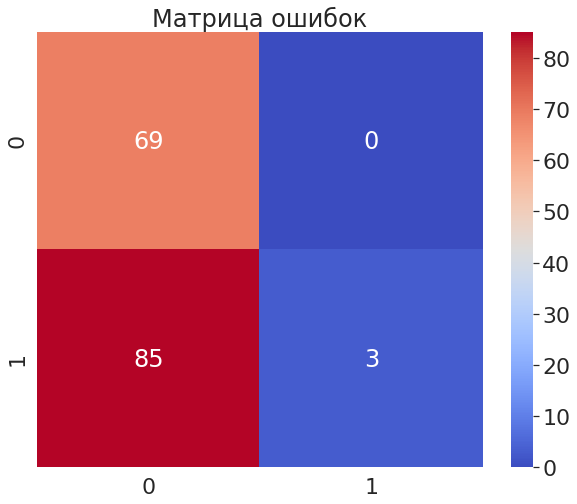

In [111]:
acc = round(accuracy_score(y_test, data['y_pred_'+str(porog)]), 2)
precision = round(precision_score(y_test, data['y_pred_'+str(porog)]), 2)
recall = round(recall_score(y_test, data['y_pred_'+str(porog)]), 2)

plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, data['y_pred_'+str(porog)])

sns.set (font_scale= 2 )
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm');
plt.title('Матрица ошибок')
print(f'Accuracy = {acc}')
print(f'Precision = {precision}')
print(f'Recall = {recall}') 

##### Cпрогнозирование вкуса молока коров, которых фермер хочет купить.

In [112]:
X_train = df_ferma_main_dad
X_test = df_cow_buy

target = 'Вкус молока'
cat_col_names = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст']
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 
                 'СПО (Сахаро-протеиновое соотношение)', 'Жирность, %', 'Белок, %']

X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_ohe = encoder.fit_transform(X[cat_col_names])

if hasattr(encoder, 'get_feature_names_out'):
    encoder_col_names = encoder.get_feature_names_out()
else:
    encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_processed = pd.DataFrame(np.hstack([X_ohe, X_scaled]), columns=np.concatenate([encoder_col_names, num_col_names]))

clf = LogisticRegression()
clf.fit(X_processed, y)

X_test_processed = X_test.drop(target, axis=1)

X_test_ohe = encoder.transform(X_test_processed[cat_col_names])
X_test_scaled = scaler.transform(X_test_processed[num_col_names])

X_cow = pd.DataFrame(np.hstack([X_test_ohe, X_test_scaled]), columns=np.concatenate([encoder_col_names, num_col_names]))

y_pred = clf.predict_proba(X_cow)[:, 1]

df_cow_buy['y_pred'] = y_pred

porog = 0.83  
df_cow_buy['Вкус молока'] = np.where(df_cow_buy['y_pred'] > porog, 'Вкусно', 'Не вкусно')

df_cow_buy['Возраст'] = df_cow_buy['Возраст'].apply(lambda x: 'Более 2 лет' if x == 1 else 'Менее 2 лет')

df_cow_buy = df_cow_buy.sort_values(by='y_pred', ascending=False).drop(columns='y_pred')
display(df_cow_buy)

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность, %","Белок, %",Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЕ в квадрате,"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Удой, кг",Вкус молока
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,Менее 2 лет,15.276162,233.361138,2019.947532,1,6365.761058,Вкусно
17,Рефлешн Соверинг,Холмистое,Соверин,Геркулес,3.77,3.053,Менее 2 лет,15.276162,233.361138,2019.947532,1,6419.892072,Не вкусно
5,Рефлешн Соверинг,Холмистое,Соверин,Геркулес,3.63,3.053,Менее 2 лет,15.276162,233.361138,2019.947532,1,6419.892072,Не вкусно
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,Менее 2 лет,15.276162,233.361138,2019.947532,1,6133.954825,Не вкусно
15,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.40,3.065,Менее 2 лет,15.276162,233.361138,2019.947532,1,6327.206675,Не вкусно
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,Менее 2 лет,15.276162,233.361138,2019.947532,1,6375.747238,Не вкусно
14,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,Менее 2 лет,15.276162,233.361138,2019.947532,1,6083.310543,Не вкусно
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,Менее 2 лет,15.276162,233.361138,2019.947532,1,6327.206675,Не вкусно
13,Вис Бик Айдиал,Равнинное,Соверин,Барин,3.42,3.075,Менее 2 лет,15.276162,233.361138,2019.947532,1,6049.610754,Не вкусно
0,Вис Бик Айдиал,Равнинное,Айдиал,Геркулес,3.58,3.076,Менее 2 лет,15.276162,233.361138,2019.947532,1,6317.220495,Не вкусно


In [113]:
X_test_processed = X_test.drop(columns=[target], errors='ignore') 

X_test_ohe = encoder.transform(X_test_processed[cat_col_names])
X_test_scaled = scaler.transform(X_test_processed[num_col_names])

X_test_processed = pd.DataFrame(
    np.hstack([X_test_ohe, X_test_scaled]),
    columns=np.concatenate([encoder.get_feature_names(cat_col_names), num_col_names])  
)

y_pred_proba = clf.predict_proba(X_test_processed)[:, 1]

df_cow_buy['y_pred'] = y_pred_proba

porog = 0.83

df_cow_buy['Вкус молока'] = np.where(df_cow_buy['y_pred'] > porog, 'Вкусно', 'Не вкусно')

df_cow_buy['Возраст'] = df_cow_buy['Возраст'].apply(lambda x: 'Более 2 лет' if x == 1 else 'Менее 2 лет')

df_cow_buy = df_cow_buy.sort_values(by='y_pred', ascending=False).drop(columns='y_pred')

display(df_cow_buy)

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность, %","Белок, %",Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЕ в квадрате,"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Удой, кг",Вкус молока
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,Менее 2 лет,15.276162,233.361138,2019.947532,1,6313.938111,Вкусно
19,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.64,3.074,Менее 2 лет,15.276162,233.361138,2019.947532,1,6375.747238,Не вкусно
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,Менее 2 лет,15.276162,233.361138,2019.947532,1,6375.747238,Не вкусно
6,Вис Бик Айдиал,Равнинное,Айдиал,Геркулес,3.58,3.076,Менее 2 лет,15.276162,233.361138,2019.947532,1,6317.220495,Не вкусно
2,Рефлешн Соверинг,Холмистое,Соверин,Барин,3.59,3.074,Менее 2 лет,15.276162,233.361138,2019.947532,1,6131.851105,Не вкусно
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,Менее 2 лет,15.276162,233.361138,2019.947532,1,6133.954825,Не вкусно
8,Рефлешн Соверинг,Холмистое,Соверин,Барин,3.59,3.074,Менее 2 лет,15.276162,233.361138,2019.947532,1,6131.851105,Не вкусно
15,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.40,3.065,Менее 2 лет,15.276162,233.361138,2019.947532,1,6327.206675,Не вкусно
11,Рефлешн Соверинг,Холмистое,Соверин,Геркулес,3.73,3.073,Менее 2 лет,15.276162,233.361138,2019.947532,1,6419.892072,Не вкусно
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,Менее 2 лет,15.276162,233.361138,2019.947532,1,6365.761058,Не вкусно


##### Коровы с "Вкусным" молоком, которых хочет купить фермер

In [114]:
df_cow_buy.loc[df_cow_buy['Вкус молока'] == 'Вкусно']

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность, %","Белок, %",Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЕ в квадрате,"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Удой, кг",Вкус молока
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,Менее 2 лет,15.276162,233.361138,2019.947532,1,6313.938111,Вкусно


### Вывод:

- Модель применена к новому набору коров (cow_buy.csv);


- По вероятностному прогнозу выделены коровы с вероятностью вкусного молока выше порога 0.83;


- Выявлены коровы с вкусом молока "Вкусно", которых можно рекомендовать к покупке.


## Итоговые выводы

In [115]:
df_cow_buy.sort_values (by = ['Удой, кг'], ascending = False).loc[(df_cow_buy['Удой, кг'] >= 6000) & (df_cow_buy['Вкус молока'] == 'Вкусно')]

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность, %","Белок, %",Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЕ в квадрате,"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Удой, кг",Вкус молока
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,Менее 2 лет,15.276162,233.361138,2019.947532,1,6313.938111,Вкусно


### Предобработка данных

В полученных данных удалены дубликаты, проверены отсутствие пропусков и скорректированы типы данных и названия.

- Приведены следующие столбцы к нужным типам данных: 'ЭКЕ (Энергетическая кормовая единица)',  'СПО (Сахаро-протеиновое соотношение)',  'Жирность, %', 'Белок, %';


- Значения в столбцах 'Возраст' ,  'Порода', 'Тип пастбища' , 'Порода папы быка', 'Вкус молока' приведены к единому стилю;


- Столбцы 'порода папы_быка', 'Имя_папы', 'Текущая_жирность,%', 'Текущий_уровень_белок,%' переименованы на 'Порода папы быка',  'Имя папы', 'Текущий уровень белка, %',  'Текущая жирность, %'


### Исследовательский анализ данных

В данных был обнаружен только один выброс, который находился в столбце удой в таблице фермера. Этот выброс был удален. Количественные данные характеризуются ненормальным распределением. Для стада фермера характерны следующие особенности:
- Медиана удоя превышает 6000 кг;


- Преобладают коровы породы "Вис Бик Айдиал";


- Холмистый тип пастбища является наиболее распространенным;


- Большая часть молока у фермера имеет хороший вкус;


- Большинство коров старше 2 лет;


- Таблица с именами папы коровы показывает следующее распределение: первое место занимает Барин, второе - Буйный, третье - Соловчик, четвертое - Геркулес;


- Среди пап коров первое место занимает Буйный, второе - Геркулес, далее следуют Барин и Соловчик с примерно одинаковыми показателями

### Корреляционный анализ признаков в датасете ferma_main.csv

**Признаки, которые линейно не связаны с таргетом (имеют очень низкую корреляцию, близкую к нулю):**

1. **Белок, %**  
   - Корреляция с Удоем, кг: **-0.0057**  
   - Корреляция с ЭКЕ: **-0.013**  
   - Корреляция с СПО: **0.11**  
   - Корреляция с Жирностью, %: **0.043**  
   

2. **Сырой протеин, г**  
   - Корреляция с Белком, %: **0.23** (умеренно низкая, но всё же выше, чем у других признаков)  


3. **Удой, кг**  
   - Корреляция с Белком, %: **-0.0057**  


4. **ЭКЕ**  
   - Корреляция с Белком, %: **-0.013**  


5. **СПО**  
   - Корреляция с Белком, %: **0.11**  


6. **Жирность, %**  
   - Корреляция с Белком, %: **0.043**  
 
Наиболее слабые линейные связи наблюдаются у **Белка, %** с остальными показателями, особенно с Удоем, кг и ЭКЕ. Остальные признаки демонстрируют умеренную или высокую корреляцию между собой, но слабо связаны с содержанием белка в молоке.

### Задача регрессии

- Преобразовали Сахаро-протеинового соотношения (СПО) в категориальный признак, из-за чего смогли выявить и применить границы нелинейности;


- Ввели признак "ЭКЕ в квадрате", что позволило повысить точности модели;


- Добавили категориальный признак "Имя папы" для достижения максимальной точности прогнозирования;


- Применили улучшенную модель для прогноза удоев коров.


### Задача классификации

- Модель применена к новому набору коров (cow_buy.csv);


- По вероятностному прогнозу выделены коровы с вероятностью вкусного молока выше порога 0.83;


- Выявлены коровы с вкусом молока "Вкусно", которых можно рекомендовать к покупке.


**Выявлена одна корова со средним удоем за год — не менее 6000 килограммов и вкусом молока "Вкусно", которую можно рекомендовать к покупке**